<a href="https://colab.research.google.com/github/binodsth2/Blood_Sugar_Detection_using_machine_Learning/blob/main/Diabetes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             f1_score, precision_score, recall_score, roc_auc_score,
                             roc_curve, auc)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

In [5]:
print("="*80)
print("DIABETES PREDICTION AND ANALYSIS SYSTEM")
print("="*80)

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/pima_indian.csv')
target_column = 'Outcome'

def display_dataset_info(data, target_col):
    """Display comprehensive dataset information"""
    print("\n1. DATASET INFORMATION:")
    print("-"*40)
    print(f"Shape: {data.shape[0]} rows × {data.shape[1]} columns")
    print(f"\nColumn Names: {data.columns.tolist()}")
    print(f"\nMissing Values:\n{data.isnull().sum()}")
    print(f"\nBasic Statistics:\n{data.describe()}")

    print(f"\n2. TARGET VARIABLE DISTRIBUTION ({target_col}):")
    target_dist = data[target_col].value_counts().sort_index()
    print(target_dist)
    print("\nClass Proportions:")
    print((data[target_col].value_counts(normalize=True).sort_index() * 100).round(2))

    return target_dist

target_distribution = display_dataset_info(df, target_column)

DIABETES PREDICTION AND ANALYSIS SYSTEM

1. DATASET INFORMATION:
----------------------------------------
Shape: 768 rows × 9 columns

Column Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
if df.isnull().sum().any():
    print("\nHandling missing values...")
    df = df.fillna(df.mean())


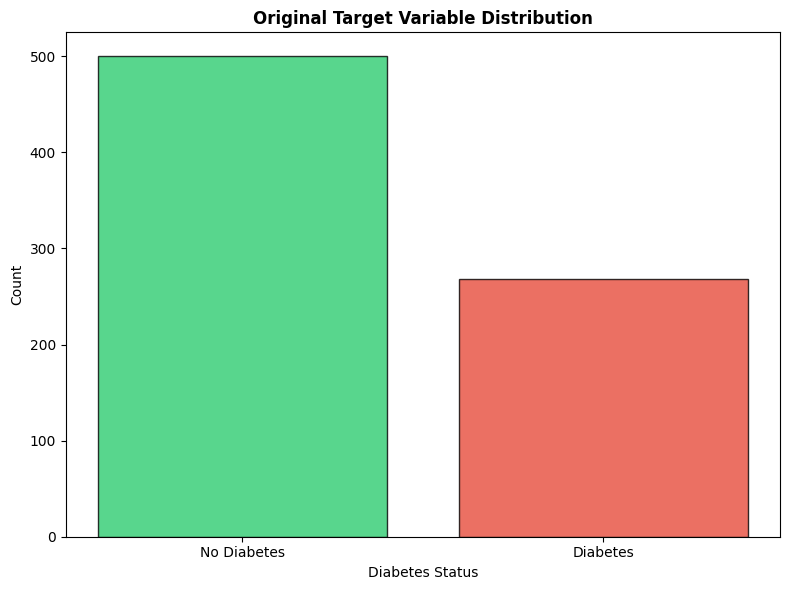

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(['No Diabetes', 'Diabetes'], target_distribution.values,
        color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
plt.title('Original Target Variable Distribution', fontweight='bold')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [8]:
print("\n" + "="*80)
print("ENHANCED DATA EXPLORATION")
print("="*80)



ENHANCED DATA EXPLORATION


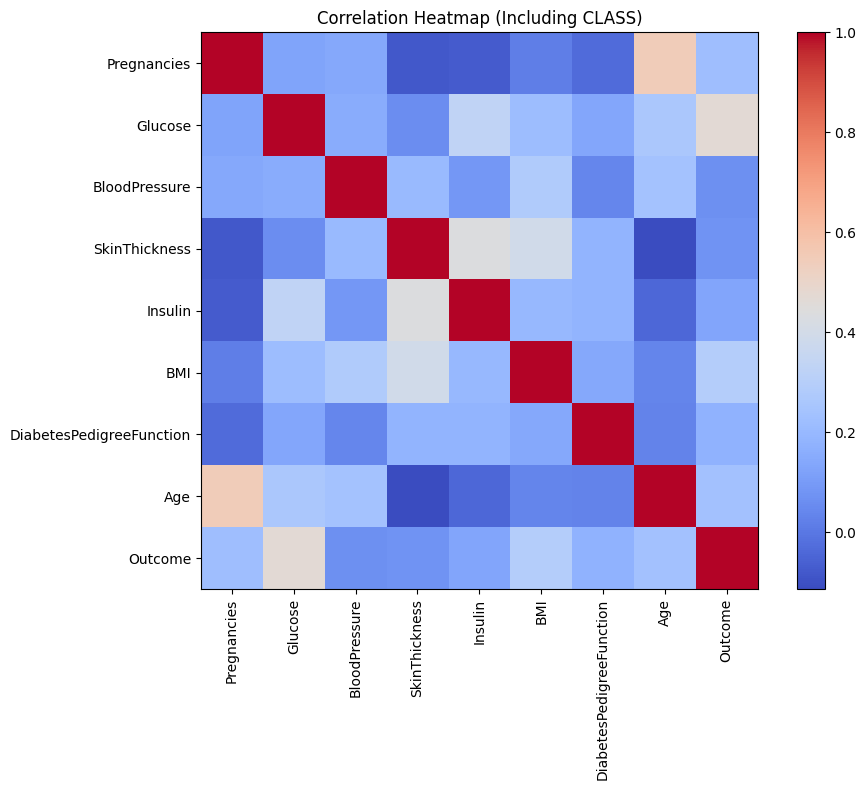

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/pima_indian.csv')
# df = df.drop(columns=["ID", "No_Pation"], errors="ignore")

# ============================================================
# 4. KEEP ONLY NUMERIC COLUMNS
# ============================================================
numeric_df = df.select_dtypes(include=[np.number])

# ============================================================
# 5. COMPUTE CORRELATION MATRIX
# ============================================================
corr_matrix = numeric_df.corr()

# ============================================================
# 6. PLOT FULL CORRELATION HEATMAP (INCLUDING CLASS)
# ============================================================
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap (Including CLASS)")
plt.tight_layout()
plt.show()

In [41]:
# Identify the overall best model after hyperparameter tuning
# This assumes 'results_after' contains the models and their metrics

# Find the model with the highest 'Test Accuracy' after tuning
best_model_name_tuned = max(results_after, key=lambda name: results_after[name]['test_accuracy'])
best_model = results_after[best_model_name_tuned]['model']
best_model_name = best_model_name_tuned

print(f"\n✓ BEST MODEL SELECTED (After Hyperparameter Tuning): {best_model_name}")
print(f"  Test Accuracy: {results_after[best_model_name]['test_accuracy']:.4f}")
print(f"  F1-Score: {results_after[best_model_name]['f1']:.4f}")

# Ensure 'best_model_name' is set for later plots as well
# This is already set in the previous cell but reinforced here
# For compatibility with subsequent cells that use 'best_model' and 'best_model_name'



✓ BEST MODEL SELECTED (After Hyperparameter Tuning): Random Forest
  Test Accuracy: 0.8050
  F1-Score: 0.8048


In [42]:
# Identify the overall best model after hyperparameter tuning
# This assumes 'results_after' contains the models and their metrics

# Find the model with the highest 'Test Accuracy' after tuning
best_model_name_tuned = max(results_after, key=lambda name: results_after[name]['test_accuracy'])
best_model = results_after[best_model_name_tuned]['model']
best_model_name = best_model_name_tuned

print(f"\n✓ BEST MODEL SELECTED (After Hyperparameter Tuning): {best_model_name}")
print(f"  Test Accuracy: {results_after[best_model_name]['test_accuracy']:.4f}")
print(f"  F1-Score: {results_after[best_model_name]['f1']:.4f}")

# Ensure 'best_model_name' is set for later plots as well
# This is already set in the previous cell but reinforced here
# For compatibility with subsequent cells that use 'best_model' and 'best_model_name'



✓ BEST MODEL SELECTED (After Hyperparameter Tuning): Random Forest
  Test Accuracy: 0.8050
  F1-Score: 0.8048


In [43]:
print("\n" + "="*80)
print("SAVING ARTIFACTS")
print("="*80)

joblib.dump(best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n✓ Model and preprocessors saved successfully!")

def load_saved_artifacts():
    """Load saved model and preprocessors with error handling"""
    try:
        model = joblib.load('best_diabetes_model.pkl')
        scaler_obj = joblib.load('scaler.pkl')
        le_obj = joblib.load('label_encoder.pkl')
        print("✓ All artifacts loaded successfully!")
        return model, scaler_obj, le_obj
    except FileNotFoundError as e:
        print(f"✗ Error loading artifacts: {e}")
        print("Using current session objects instead.")
        return best_model, scaler, le

def predict_diabetes_risk_enhanced(patient_data, model=None, scaler_obj=None, le_obj=None):
    """
    Enhanced prediction function with validation and error handling

    Args:
        patient_data (dict): Patient health metrics
        model: Trained model (uses best_model if None)
        scaler_obj: Fitted scaler (uses scaler if None)
        le_obj: Label encoder (uses le if None)

    Returns:
        dict: Prediction results with probabilities and risk metrics
    """
    if model is None:
        model = best_model
    if scaler_obj is None:
        scaler_obj = scaler
    if le_obj is None:
        le_obj = le

    try:
        # Validate input
        if not isinstance(patient_data, dict):
            raise ValueError("patient_data must be a dictionary")

        # Convert to DataFrame
        patient_df = pd.DataFrame([patient_data])

        # Fill missing columns with median
        for col in x.columns:
            if col not in patient_df.columns:
                patient_df[col] = x[col].median()

        # Reorder columns
        patient_df = patient_df[x.columns]

        # Validate value ranges
        for col in patient_df.columns:
            if patient_df[col].isnull().any():
                print(f"⚠ Warning: Column {col} has null values, using median")
                patient_df[col].fillna(x[col].median(), inplace=True)

        # Scale
        patient_scaled = scaler_obj.transform(patient_df)

        # Predict
        prediction_encoded = model.predict(patient_scaled)[0]
        prediction = le_obj.inverse_transform([prediction_encoded])[0]

        # Get probabilities
        proba = model.predict_proba(patient_scaled)[0]
        prob_dict = {class_name: f"{proba[i]:.2%}"
                    for i, class_name in enumerate(le_obj.classes_)}

        # Risk score (0-10)
        risk_score = proba[2] * 10  # Diabetes class probability

        return {
            'prediction': prediction,
            'prediction_label': le_obj.classes_[prediction_encoded],
            'risk_level': ['Low Risk', 'Medium Risk', 'High Risk'][prediction_encoded],
            'risk_score': f"{risk_score:.1f}/10",
            'probabilities': prob_dict,
            'confidence': f"{max(proba)*100:.1f}%"
        }

    except Exception as e:
        print(f"✗ Prediction Error: {e}")
        return None

# Test prediction function
print("\nTesting Prediction Function:")
print("-" * 80)

example_patient = {col: x[col].median() for col in x.columns}
result = predict_diabetes_risk_enhanced(example_patient)

if result:
    print(f"""
Patient Risk Assessment:
  ├─ Prediction: {result['prediction_label']}
  ├─ Risk Level: {result['risk_level']}
  ├─ Risk Score: {result['risk_score']}
  ├─ Confidence: {result['confidence']}
  └─ Probabilities:
""")
    for risk, prob in result['probabilities'].items():
        print(f"      • {risk}: {prob}")


SAVING ARTIFACTS

✓ Model and preprocessors saved successfully!

Testing Prediction Function:
--------------------------------------------------------------------------------
✗ Prediction Error: index 2 is out of bounds for axis 0 with size 2


In [44]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*80)

# Retrieve metrics for the best model after hyperparameter tuning
final_best_model_metrics = results_after[best_model_name]

print(f"""
Best Model: {best_model_name}
Test Accuracy: {final_best_model_metrics['test_accuracy']:.4f}
F1-Score: {final_best_model_metrics['f1']:.4f}
Precision: {final_best_model_metrics['precision']:.4f}
Recall: {final_best_model_metrics['recall']:.4f}

✓ Model ready for deployment!
""")



ANALYSIS COMPLETE - FINAL SUMMARY

Best Model: Random Forest
Test Accuracy: 0.8050
F1-Score: 0.8048
Precision: 0.8065
Recall: 0.8050

✓ Model ready for deployment!




MODEL TRAINING BEFORE RANDOMIZED SEARCH

Logistic Regression
  Val Accuracy : 0.8000
  Test Accuracy: 0.7600
  F1-Score     : 0.7599
  Precision    : 0.7604
  Recall       : 0.7600

Random Forest
  Val Accuracy : 0.8313
  Test Accuracy: 0.8000
  F1-Score     : 0.7998
  Precision    : 0.8011
  Recall       : 0.8000

XGBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7850
  F1-Score     : 0.7850
  Precision    : 0.7850
  Recall       : 0.7850

K-Nearest Neighbors
  Val Accuracy : 0.8187
  Test Accuracy: 0.7550
  F1-Score     : 0.7528
  Precision    : 0.7646
  Recall       : 0.7550

Gradient Boosting
  Val Accuracy : 0.8187
  Test Accuracy: 0.8200
  F1-Score     : 0.8199
  Precision    : 0.8205
  Recall       : 0.8200

AdaBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7650
  F1-Score     : 0.7645
  Precision    : 0.7672
  Recall       : 0.7650

Bagging Classifier
  Val Accuracy : 0.7875
  Test Accuracy: 0.8050
  F1-Score     : 0.8049
  Precision    : 0.8058
  Recall       : 0.8050

MOD

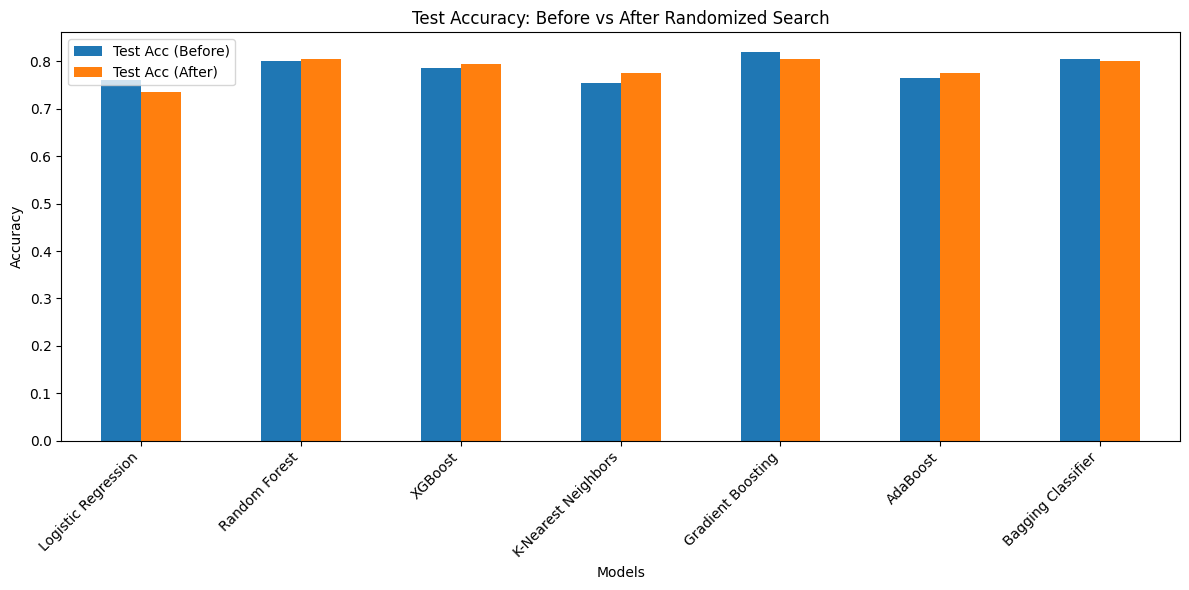

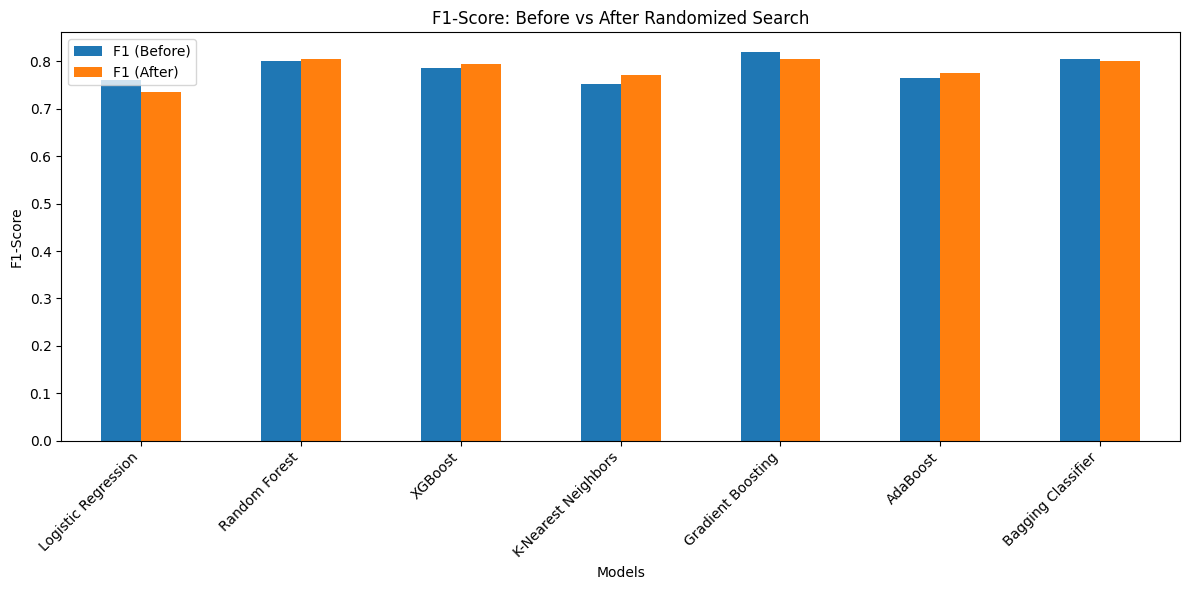

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


models = {
    'Logistic Regression': LogisticRegression(
        max_iter=2000, multi_class='multinomial', solver='lbfgs'
    ),

    'Random Forest': RandomForestClassifier(random_state=42),

    'XGBoost': XGBClassifier(
        eval_metric='mlogloss',
        random_state=42
    ),

    'K-Nearest Neighbors': KNeighborsClassifier(),

    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

    'AdaBoost': AdaBoostClassifier(random_state=42),

    'Bagging Classifier': BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        random_state=42
    )
}


param_distributions = {
    'Logistic Regression': {
        'C': np.logspace(-3, 2, 20)
    },

    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },

    'XGBoost': {
        'n_estimators': [100, 200, 400],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },

    'K-Nearest Neighbors': {
        'n_neighbors': range(3, 15),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },

    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5]
    },

    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'Bagging Classifier': {
        'n_estimators': [100, 200, 300],
        'max_samples': [0.6, 0.8, 1.0],
        'max_features': [0.6, 0.8, 1.0]
    }
}

def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    y_test_pred = model.predict(x_test)

    return {
        'val_accuracy': accuracy_score(y_val, y_val_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred, average='weighted'),
        'precision': precision_score(y_test, y_test_pred, average='weighted'),
        'recall': recall_score(y_test, y_test_pred, average='weighted')
    }


print("\n" + "="*80)
print("MODEL TRAINING BEFORE RANDOMIZED SEARCH")
print("="*80)

results_before = {}

for name, model in models.items():
    metrics = evaluate_model(
        model,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )
    results_before[name] = metrics

    print(f"\n{name}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


print("\n" + "="*80)
print("MODEL TRAINING AFTER RANDOMIZED SEARCH")
print("="*80)

results_after = {}

# Store best estimators directly in results_after
for name, model in models.items():
    print(f"\nTuning {name}...")

    random_search = RandomizedSearchCV(
        model,
        param_distributions[name],
        n_iter=30,
        scoring='f1_weighted',
        cv=3,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(x_train_scaled, y_train_encoded)
    best_model_tuned = random_search.best_estimator_

    metrics = evaluate_model(
        best_model_tuned,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )

    results_after[name] = {'model': best_model_tuned, **metrics}

    print(f"  Best Params  : {random_search.best_params_}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


models_list = list(results_before.keys())

comparison_df = pd.DataFrame({
    'Model': models_list,
    'Test Acc (Before)': [results_before[m]['test_accuracy'] for m in models_list],
    'Test Acc (After)':  [results_after[m]['test_accuracy'] for m in models_list],
    'F1 (Before)': [results_before[m]['f1'] for m in models_list],
    'F1 (After)':  [results_after[m]['f1'] for m in models_list]
})

print("\n" + "="*80)
print("FINAL COMPARISON TABLE")
print("="*80)
print(comparison_df.sort_values('Test Acc (After)', ascending=False))


comparison_df.set_index('Model')[['Test Acc (Before)', 'Test Acc (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Test Accuracy: Before vs After Randomized Search")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test_accuracy_before_after_tuning.svg')
plt.show()


comparison_df.set_index('Model')[['F1 (Before)', 'F1 (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("F1-Score: Before vs After Randomized Search")
plt.ylabel("F1-Score")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('f1_score_before_after_tuning.svg')
plt.show()

In [47]:
# Identify the overall best model after hyperparameter tuning
# This assumes 'results_after' contains the models and their metrics

# Find the model with the highest 'Test Accuracy' after tuning
best_model_name_tuned = max(results_after, key=lambda name: results_after[name]['test_accuracy'])
best_model = results_after[best_model_name_tuned]['model']
best_model_name = best_model_name_tuned

print(f"\n✓ BEST MODEL SELECTED (After Hyperparameter Tuning): {best_model_name}")
print(f"  Test Accuracy: {results_after[best_model_name]['test_accuracy']:.4f}")
print(f"  F1-Score: {results_after[best_model_name]['f1']:.4f}")

# Ensure 'best_model_name' is set for later plots as well
# This is already set in the previous cell but reinforced here
# For compatibility with subsequent cells that use 'best_model' and 'best_model_name'



✓ BEST MODEL SELECTED (After Hyperparameter Tuning): Random Forest
  Test Accuracy: 0.8050
  F1-Score: 0.8048



--------------------------------------------------------------------------------
DETAILED EVALUATION OF BEST MODEL
--------------------------------------------------------------------------------

Classification Report (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.83      0.77      0.80       100
    Diabetes       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



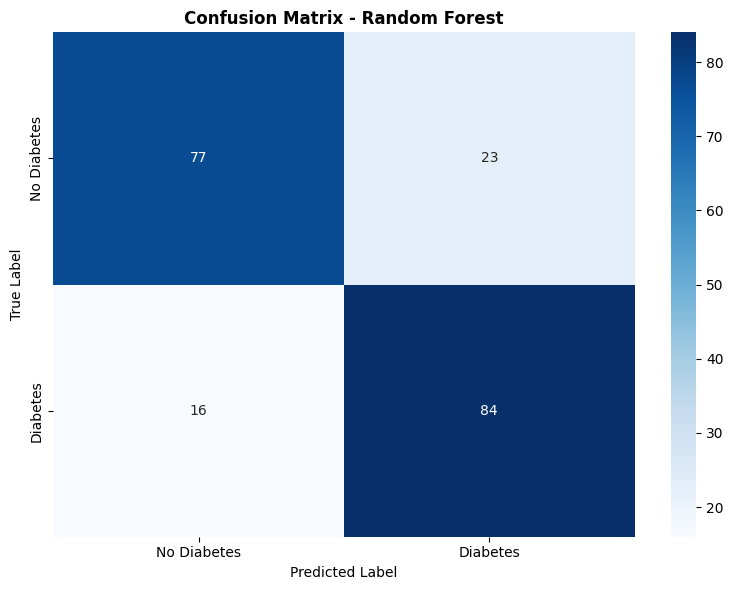

In [48]:
print("\n" + "-"*80)
print("DETAILED EVALUATION OF BEST MODEL")
print("-"*80)

y_pred_best = best_model.predict(x_test_scaled)

print(f"\nClassification Report ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best,
                           target_names=['No Diabetes', 'Diabetes']))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.svg')
plt.show()


--------------------------------------------------------------------------------
LEARNING CURVES ANALYSIS
--------------------------------------------------------------------------------


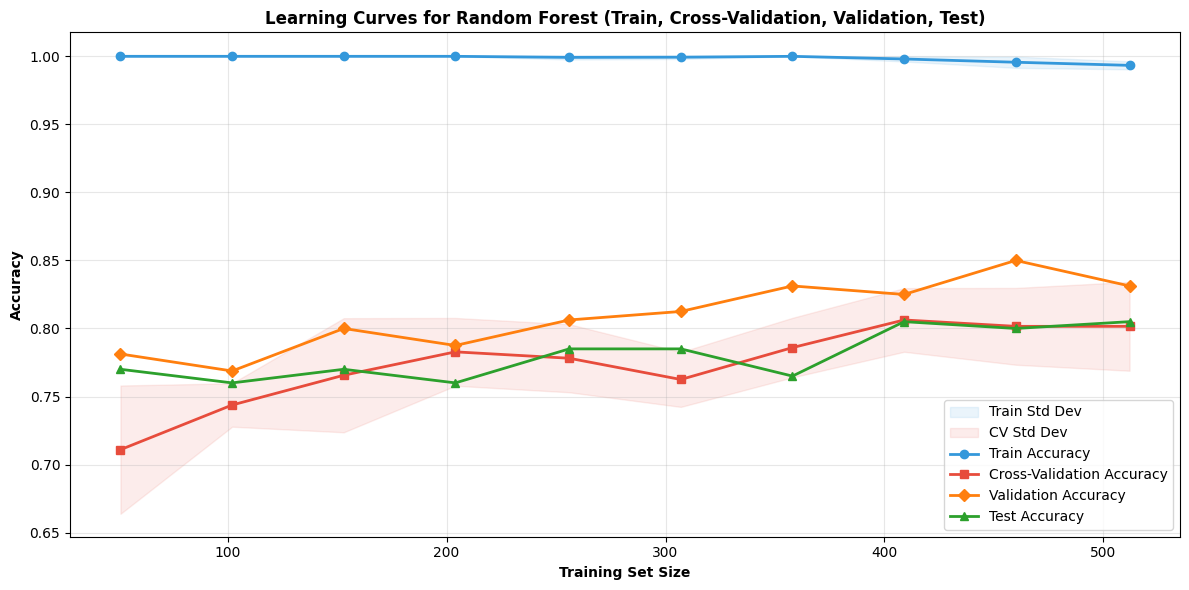

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score # Added for test/validation scoring
from sklearn.base import clone # Added for robust model re-initialization

print("\n" + "-"*80)
print("LEARNING CURVES ANALYSIS")
print("-"*80)

# 1. Generate learning curves for training and cross-validation from the training set
train_sizes, train_scores, cv_scores = learning_curve(
    best_model, x_train_scaled, y_train_encoded,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1) # Cross-validation scores on training data
cv_std = np.std(cv_scores, axis=1)

# 2. Calculate learning curves for the separate Validation and Test sets
val_scores_at_sizes = []
test_scores_at_sizes = []

for current_train_size in train_sizes:
    # Train the model on a random subset of the training data of 'current_train_size'
    n_samples_train = len(x_train_scaled)
    actual_train_size = int(current_train_size) # Ensure integer for indexing

    if actual_train_size > 0:
        # Generate random indices for the subset of training data
        indices = np.random.choice(n_samples_train, size=actual_train_size, replace=False)
        subset_x_train = x_train_scaled[indices]
        subset_y_train = y_train_encoded[indices]

        # Reinitialize and train a fresh model for each training size
        temp_model = clone(best_model)
        temp_model.fit(subset_x_train, subset_y_train)

        # Evaluate on the fixed validation set
        y_pred_val_subset = temp_model.predict(x_val_scaled)
        val_scores_at_sizes.append(accuracy_score(y_val_encoded, y_pred_val_subset))

        # Evaluate on the fixed test set
        y_pred_test_subset = temp_model.predict(x_test_scaled)
        test_scores_at_sizes.append(accuracy_score(y_test_encoded, y_pred_test_subset))
    else:
        # If no training data, scores are 0.0
        val_scores_at_sizes.append(0.0)
        test_scores_at_sizes.append(0.0)

val_mean = np.array(val_scores_at_sizes)
test_mean = np.array(test_scores_at_sizes)


# 3. Plot all four curves (Train, Cross-Validation, Validation, Test)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot standard deviations for Train and CV (from learning_curve)
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
               alpha=0.1, color='#3498db', label='Train Std Dev')
ax.fill_between(train_sizes, cv_mean - cv_std, cv_mean + cv_std,
               alpha=0.1, color='#e74c3c', label='CV Std Dev')

# Plot mean accuracies
ax.plot(train_sizes, train_mean, 'o-', color='#3498db', linewidth=2, label='Train Accuracy')
ax.plot(train_sizes, cv_mean, 's-', color='#e74c3c', linewidth=2, label='Cross-Validation Accuracy')
ax.plot(train_sizes, val_mean, 'D-', color='#ff7f0e', linewidth=2, label='Validation Accuracy') # New: actual validation set
ax.plot(train_sizes, test_mean, '^-', color='#2ca02c', linewidth=2, label='Test Accuracy')       # New: actual test set

ax.set_xlabel('Training Set Size', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title(f'Learning Curves for {best_model_name} (Train, Cross-Validation, Validation, Test)', fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curves.svg')
plt.show()


--------------------------------------------------------------------------------
FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

Top 15 Important Features:
                 Feature  Importance  Percentage
                 Glucose    0.270539   27.053929
                     BMI    0.179386   17.938628
                     Age    0.147179   14.717937
DiabetesPedigreeFunction    0.112660   11.265957
             Pregnancies    0.081297    8.129730
           BloodPressure    0.078731    7.873142
           SkinThickness    0.074162    7.416188
                 Insulin    0.056045    5.604489

Features for 80% importance: 6
Features for 90% importance: 7


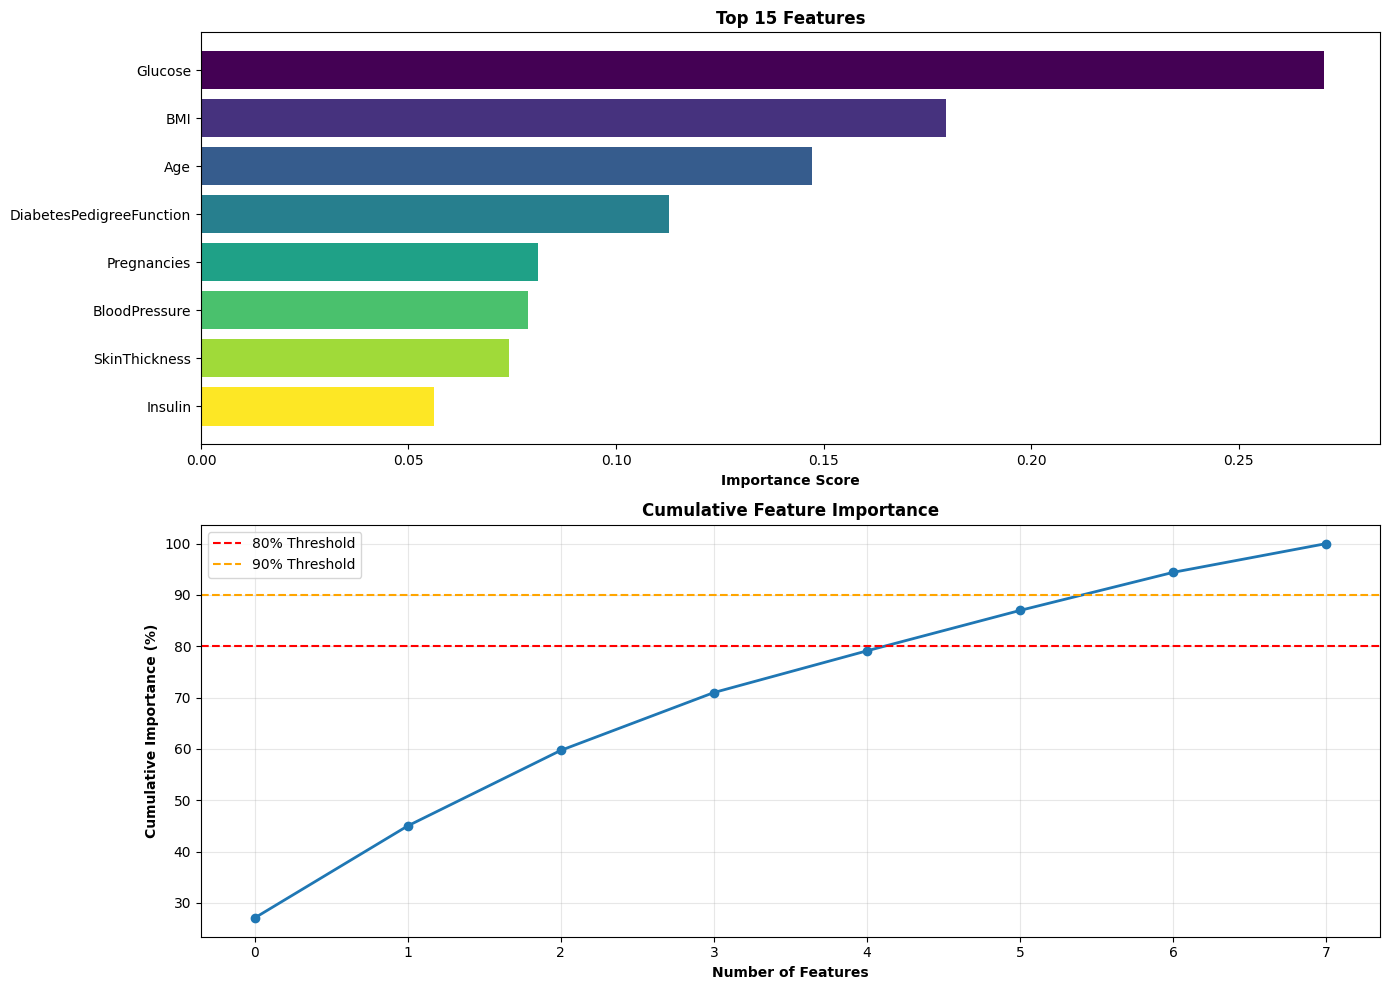

In [50]:
if hasattr(best_model, 'feature_importances_'):
    print("\n" + "-"*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("-"*80)

    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': x.columns,
        'Importance': importances,
        'Percentage': (importances / importances.sum() * 100)
    }).sort_values('Importance', ascending=False)

    print("\nTop 15 Important Features:")
    print(feature_importance_df.head(15).to_string(index=False))

    # Cumulative importance
    cumsum = feature_importance_df['Percentage'].cumsum()
    features_80 = (cumsum <= 80).sum() + 1
    features_90 = (cumsum <= 90).sum() + 1
    print(f"\nFeatures for 80% importance: {features_80}")
    print(f"Features for 90% importance: {features_90}")

    # Visualization
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Top features
    top_15 = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))
    axes[0].barh(range(len(top_15)), top_15['Importance'], color=colors)
    axes[0].set_yticks(range(len(top_15)))
    axes[0].set_yticklabels(top_15['Feature'])
    axes[0].set_xlabel('Importance Score', fontweight='bold')
    axes[0].set_title('Top 15 Features', fontweight='bold')
    axes[0].invert_yaxis()

    # Cumulative
    axes[1].plot(range(len(feature_importance_df)), cumsum.values, marker='o', linewidth=2)
    axes[1].axhline(y=80, color='r', linestyle='--', label='80% Threshold')
    axes[1].axhline(y=90, color='orange', linestyle='--', label='90% Threshold')
    axes[1].set_xlabel('Number of Features', fontweight='bold')
    axes[1].set_ylabel('Cumulative Importance (%)', fontweight='bold')
    axes[1].set_title('Cumulative Feature Importance', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_importance.svg')
    plt.show()


--------------------------------------------------------------------------------
PRECISION-RECALL ANALYSIS
--------------------------------------------------------------------------------


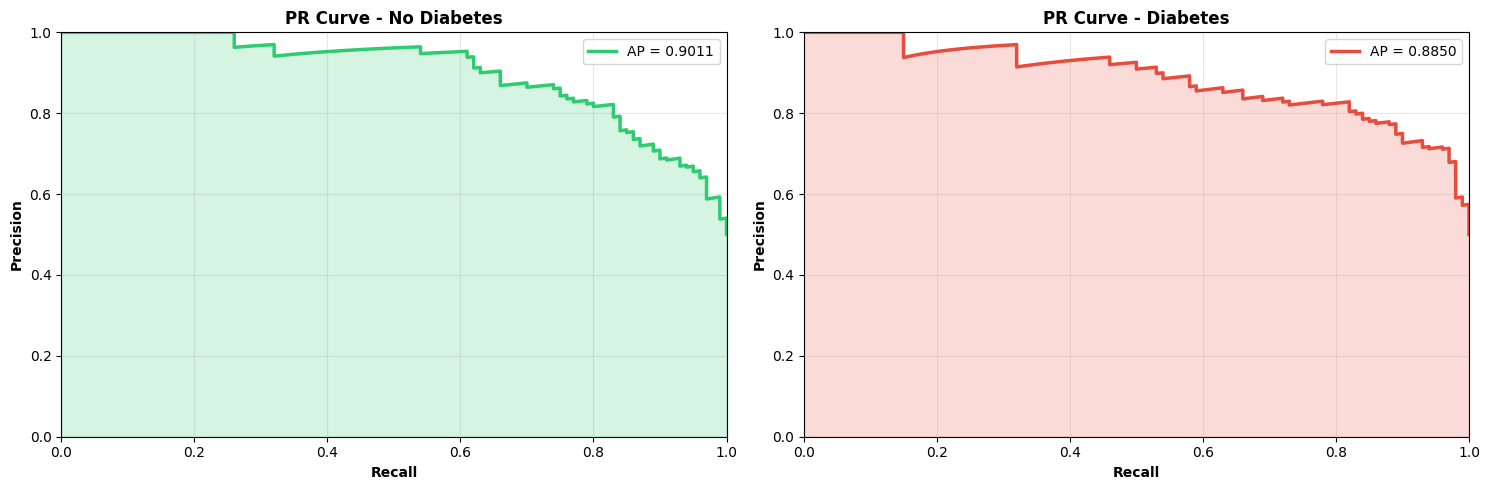

In [51]:
print("\n" + "-"*80)
print("PRECISION-RECALL ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

# Adjust number of subplots to match actual number of classes (2)
fig, axes = plt.subplots(1, len(le.classes_), figsize=(15, 5))
# Adjust class names and colors for binary classification
class_names = ['No Diabetes', 'Diabetes']
colors_pr = ['#2ecc71', '#e74c3c']

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    precision, recall, _ = precision_recall_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    avg_precision = average_precision_score(y_true_binary_class_i, y_pred_proba_best[:, i])

    axes[i].plot(recall, precision, color=colors_pr[i], lw=2.5,
                label=f'AP = {avg_precision:.4f}')
    axes[i].fill_between(recall, precision, alpha=0.2, color=colors_pr[i])
    axes[i].set_xlabel('Recall', fontweight='bold')
    axes[i].set_ylabel('Precision', fontweight='bold')
    axes[i].set_title(f'PR Curve - {class_names[i]}', fontweight='bold')
    axes[i].legend(loc='best')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('precision_recall_curves.svg')
plt.show()


--------------------------------------------------------------------------------
ROC CURVES ANALYSIS
--------------------------------------------------------------------------------


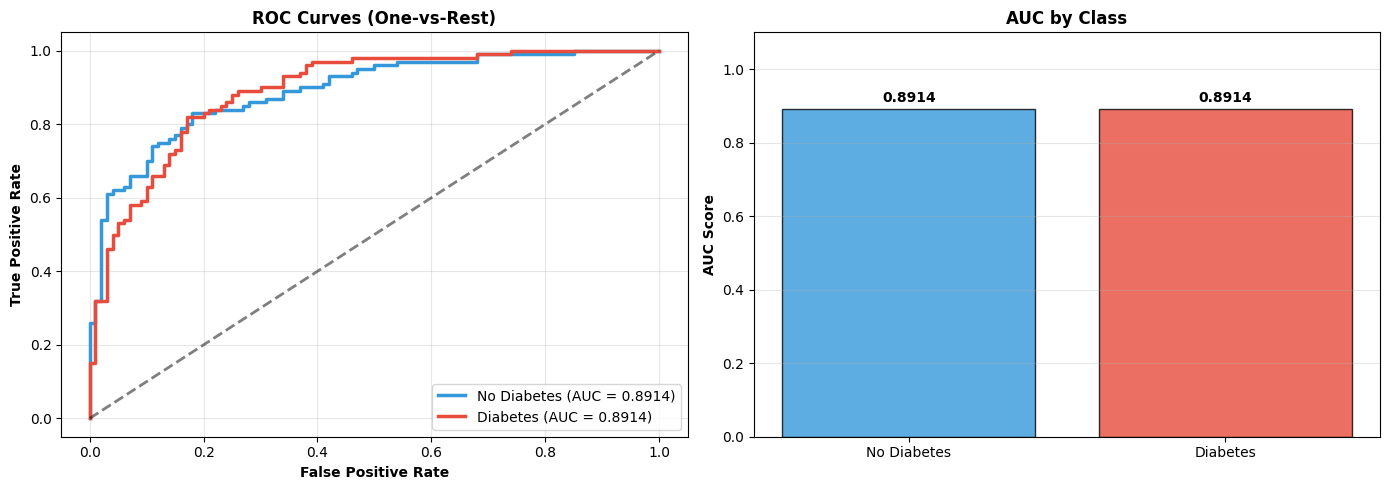


ROC-AUC Summary:
  No Diabetes: 0.8914
  Diabetes: 0.8914


In [52]:
print("\n" + "-"*80)
print("ROC CURVES ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
colors_roc = ['#3498db', '#e74c3c'] # Only two colors for two classes
class_names = ['No Diabetes', 'Diabetes'] # Only two class names

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    fpr[i], tpr[i], _ = roc_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary_class_i, y_pred_proba_best[:, i])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curves
for i, color in zip(range(len(le.classes_)), colors_roc): # Iterate only for two classes
    axes[0].plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('ROC Curves (One-vs-Rest)', fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# AUC Scores
auc_scores = [roc_auc[i] for i in range(len(le.classes_))] # Collect AUC scores for two classes
axes[1].bar(class_names, auc_scores, color=colors_roc, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('AUC Score', fontweight='bold')
axes[1].set_title('AUC by Class', fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

for i, score in enumerate(auc_scores):
    axes[1].text(i, score + 0.02, f'{score:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('roc_curves_and_auc.svg')
plt.show()

print("\nROC-AUC Summary:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: {roc_auc[i]:.4f}")


--------------------------------------------------------------------------------
AGE-BASED DIABETES ANALYSIS
--------------------------------------------------------------------------------

Age Group    | Total      | Diabetes Rate  
----------------------------------------
20-30        | 396        | 0.00           %
30-40        | 165        | 0.00           %
40-50        | 118        | 0.00           %
50-60        | 57         | 0.00           %
60-70        | 29         | 0.00           %
70-80        | 2          | 0.00           %
80+          | 1          | 0.00           %


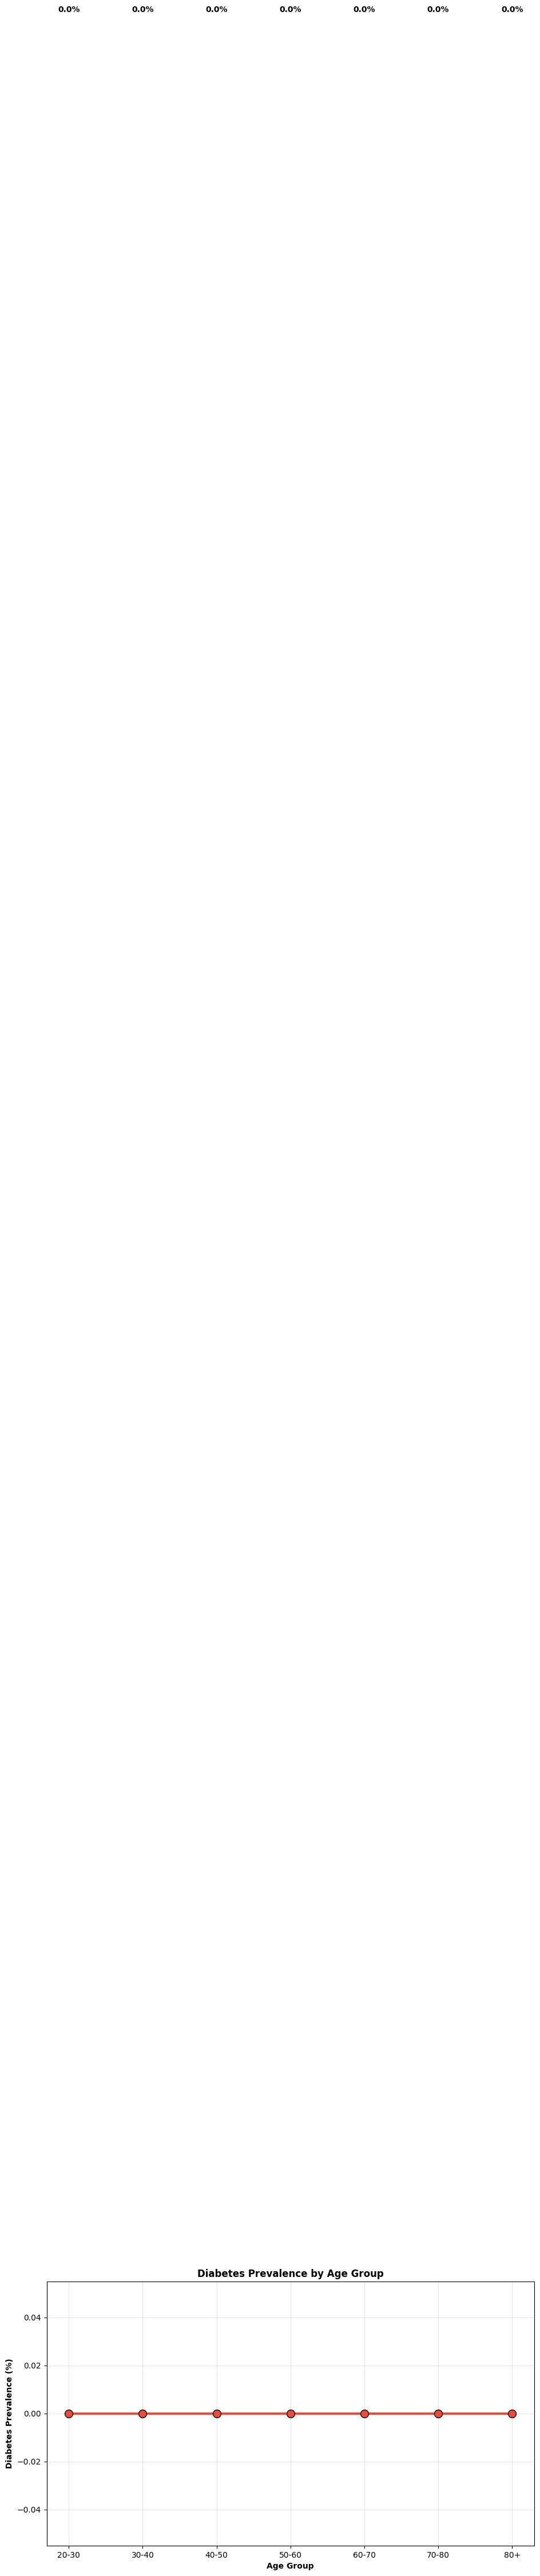

In [53]:
if 'Age' in df.columns:
    print("\n" + "-"*80)
    print("AGE-BASED DIABETES ANALYSIS")
    print("-"*80)

    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
    age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    print(f"\n{'Age Group':<12} | {'Total':<10} | {'Diabetes Rate':<15}")
    print("-" * 40)

    age_prevalence = []
    for age_group in age_labels:
        group_data = df[df['Age_Group'] == age_group]
        total = len(group_data)
        if total > 0:
            diabetes_count = (group_data[target_column] == 2).sum()
            rate = diabetes_count / total * 100
            print(f"{age_group:<12} | {total:<10,} | {rate:<15.2f}%")
            age_prevalence.append({'Age_Group': age_group, 'Rate': rate})

    # Visualization
    age_prev_df = pd.DataFrame(age_prevalence)
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.plot(age_prev_df['Age_Group'], age_prev_df['Rate'], marker='o',
           linewidth=3, markersize=10, color='#e74c3c', markeredgecolor='black')
    ax.fill_between(range(len(age_prev_df)), age_prev_df['Rate'], alpha=0.3, color='#e74c3c')
    ax.set_xlabel('Age Group', fontweight='bold')
    ax.set_ylabel('Diabetes Prevalence (%)', fontweight='bold')
    ax.set_title('Diabetes Prevalence by Age Group', fontweight='bold')
    ax.grid(True, alpha=0.3)

    for i, rate in enumerate(age_prev_df['Rate']):
        ax.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('age_group_prevalence.svg')
    plt.show()

In [54]:
print("\n" + "="*80)
print("SAVING ARTIFACTS")
print("="*80)

joblib.dump(best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n✓ Model and preprocessors saved successfully!")

def load_saved_artifacts():
    """Load saved model and preprocessors with error handling"""
    try:
        model = joblib.load('best_diabetes_model.pkl')
        scaler_obj = joblib.load('scaler.pkl')
        le_obj = joblib.load('label_encoder.pkl')
        print("✓ All artifacts loaded successfully!")
        return model, scaler_obj, le_obj
    except FileNotFoundError as e:
        print(f"✗ Error loading artifacts: {e}")
        print("Using current session objects instead.")
        return best_model, scaler, le

def predict_diabetes_risk_enhanced(patient_data, model=None, scaler_obj=None, le_obj=None):
    """
    Enhanced prediction function with validation and error handling

    Args:
        patient_data (dict): Patient health metrics
        model: Trained model (uses best_model if None)
        scaler_obj: Fitted scaler (uses scaler if None)
        le_obj: Label encoder (uses le if None)

    Returns:
        dict: Prediction results with probabilities and risk metrics
    """
    if model is None:
        model = best_model
    if scaler_obj is None:
        scaler_obj = scaler
    if le_obj is None:
        le_obj = le

    try:
        # Validate input
        if not isinstance(patient_data, dict):
            raise ValueError("patient_data must be a dictionary")

        # Convert to DataFrame
        patient_df = pd.DataFrame([patient_data])

        # Fill missing columns with median
        for col in x.columns:
            if col not in patient_df.columns:
                patient_df[col] = x[col].median()

        # Reorder columns
        patient_df = patient_df[x.columns]

        # Validate value ranges
        for col in patient_df.columns:
            if patient_df[col].isnull().any():
                print(f"⚠ Warning: Column {col} has null values, using median")
                patient_df[col].fillna(x[col].median(), inplace=True)

        # Scale
        patient_scaled = scaler_obj.transform(patient_df)

        # Predict
        prediction_encoded = model.predict(patient_scaled)[0]
        prediction_label = le_obj.inverse_transform([prediction_encoded])[0]

        # Get probabilities
        proba = model.predict_proba(patient_scaled)[0]
        prob_dict = {class_name: f"{proba[i]:.2%}"
                    for i, class_name in enumerate(le_obj.classes_)}

        # Risk score (0-10)
        # Assuming binary classification: proba[1] is the probability of the positive class (Diabetes)
        risk_score = proba[1] * 10

        # Determine risk level based on the prediction label
        risk_levels_map = {
            0: 'Low Risk',
            1: 'High Risk'
        }
        risk_level = risk_levels_map.get(prediction_encoded, 'Unknown Risk')

        return {
            'prediction': prediction_label,
            'prediction_label': prediction_label,
            'risk_level': risk_level,
            'risk_score': f"{risk_score:.1f}/10",
            'probabilities': prob_dict,
            'confidence': f"{max(proba)*100:.1f}%"
        }

    except Exception as e:
        print(f"✗ Prediction Error: {e}")
        return None

# Test prediction function
print("\nTesting Prediction Function:")
print("-" * 80)

example_patient = {col: x[col].median() for col in x.columns}
result = predict_diabetes_risk_enhanced(example_patient)

if result:
    print(f"""
Patient Risk Assessment:
  ├─ Prediction: {result['prediction_label']}
  ├─ Risk Level: {result['risk_level']}
  ├─ Risk Score: {result['risk_score']}
  ├─ Confidence: {result['confidence']}
  └─ Probabilities:
""")
    for risk, prob in result['probabilities'].items():
        print(f"      • {risk}: {prob}")


SAVING ARTIFACTS

✓ Model and preprocessors saved successfully!

Testing Prediction Function:
--------------------------------------------------------------------------------

Patient Risk Assessment:
  ├─ Prediction: 1
  ├─ Risk Level: High Risk
  ├─ Risk Score: 6.2/10
  ├─ Confidence: 61.9%
  └─ Probabilities:

      • 0: 38.10%
      • 1: 61.90%


In [55]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*80)

# Retrieve metrics for the best model after hyperparameter tuning
final_best_model_metrics = results_after[best_model_name]

print(f"""
Best Model: {best_model_name}
Test Accuracy: {final_best_model_metrics['test_accuracy']:.4f}
F1-Score: {final_best_model_metrics['f1']:.4f}
Precision: {final_best_model_metrics['precision']:.4f}
Recall: {final_best_model_metrics['recall']:.4f}

✓ Model ready for deployment!
""")



ANALYSIS COMPLETE - FINAL SUMMARY

Best Model: Random Forest
Test Accuracy: 0.8050
F1-Score: 0.8048
Precision: 0.8065
Recall: 0.8050

✓ Model ready for deployment!




MODEL TRAINING BEFORE RANDOMIZED SEARCH

Logistic Regression
  Val Accuracy : 0.8000
  Test Accuracy: 0.7600
  F1-Score     : 0.7599
  Precision    : 0.7604
  Recall       : 0.7600

Random Forest
  Val Accuracy : 0.8313
  Test Accuracy: 0.8000
  F1-Score     : 0.7998
  Precision    : 0.8011
  Recall       : 0.8000

XGBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7850
  F1-Score     : 0.7850
  Precision    : 0.7850
  Recall       : 0.7850

K-Nearest Neighbors
  Val Accuracy : 0.8187
  Test Accuracy: 0.7550
  F1-Score     : 0.7528
  Precision    : 0.7646
  Recall       : 0.7550

Gradient Boosting
  Val Accuracy : 0.8187
  Test Accuracy: 0.8200
  F1-Score     : 0.8199
  Precision    : 0.8205
  Recall       : 0.8200

AdaBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7650
  F1-Score     : 0.7645
  Precision    : 0.7672
  Recall       : 0.7650

Bagging Classifier
  Val Accuracy : 0.7875
  Test Accuracy: 0.8050
  F1-Score     : 0.8049
  Precision    : 0.8058
  Recall       : 0.8050

MOD

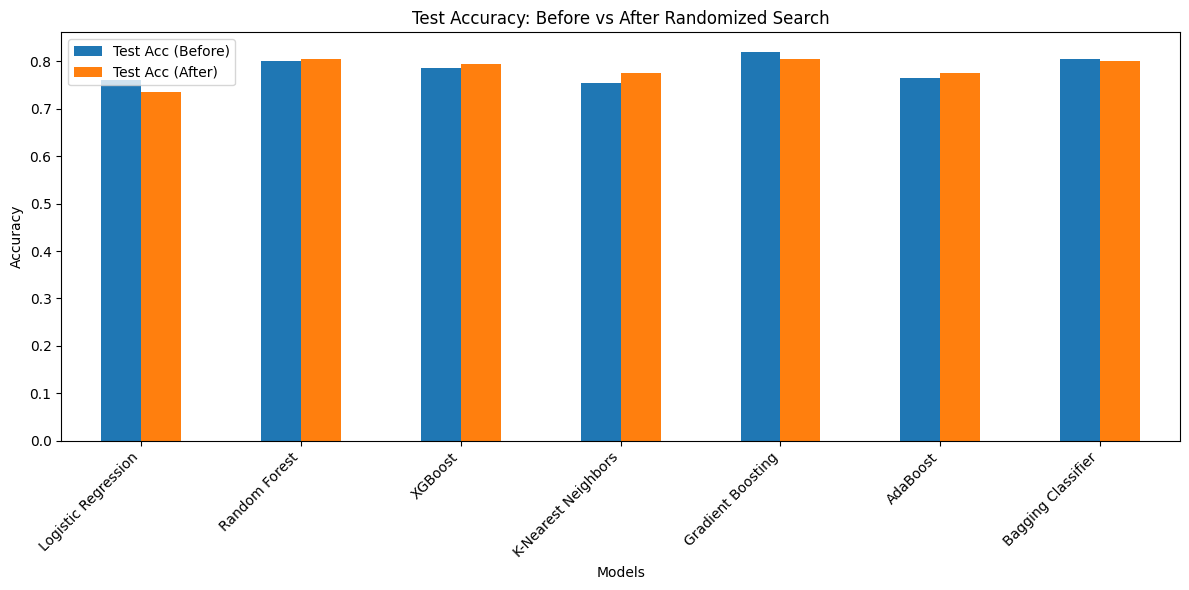

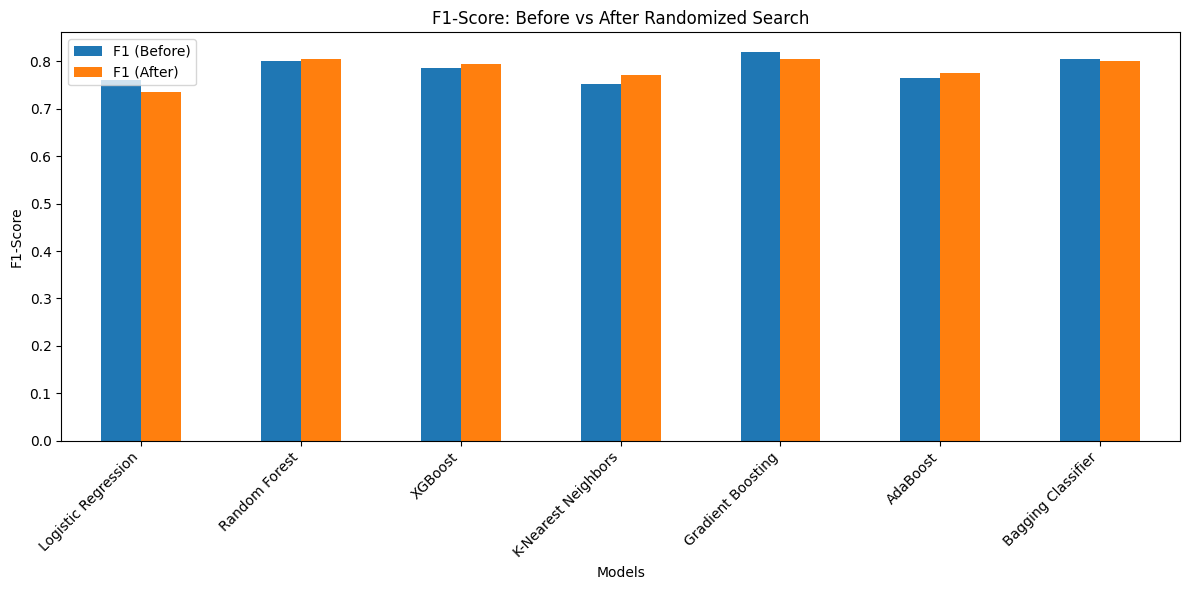

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


models = {
    'Logistic Regression': LogisticRegression(
        max_iter=2000, multi_class='multinomial', solver='lbfgs'
    ),

    'Random Forest': RandomForestClassifier(random_state=42),

    'XGBoost': XGBClassifier(
        eval_metric='mlogloss',
        random_state=42
    ),

    'K-Nearest Neighbors': KNeighborsClassifier(),

    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

    'AdaBoost': AdaBoostClassifier(random_state=42),

    'Bagging Classifier': BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        random_state=42
    )
}


param_distributions = {
    'Logistic Regression': {
        'C': np.logspace(-3, 2, 20)
    },

    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },

    'XGBoost': {
        'n_estimators': [100, 200, 400],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },

    'K-Nearest Neighbors': {
        'n_neighbors': range(3, 15),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },

    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5]
    },

    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'Bagging Classifier': {
        'n_estimators': [100, 200, 300],
        'max_samples': [0.6, 0.8, 1.0],
        'max_features': [0.6, 0.8, 1.0]
    }
}

def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    y_test_pred = model.predict(x_test)

    return {
        'val_accuracy': accuracy_score(y_val, y_val_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred, average='weighted'),
        'precision': precision_score(y_test, y_test_pred, average='weighted'),
        'recall': recall_score(y_test, y_test_pred, average='weighted')
    }


print("\n" + "="*80)
print("MODEL TRAINING BEFORE RANDOMIZED SEARCH")
print("="*80)

results_before = {}

for name, model in models.items():
    metrics = evaluate_model(
        model,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )
    results_before[name] = metrics

    print(f"\n{name}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


print("\n" + "="*80)
print("MODEL TRAINING AFTER RANDOMIZED SEARCH")
print("="*80)

results_after = {}

# Store best estimators directly in results_after
for name, model in models.items():
    print(f"\nTuning {name}...")

    random_search = RandomizedSearchCV(
        model,
        param_distributions[name],
        n_iter=30,
        scoring='f1_weighted',
        cv=3,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(x_train_scaled, y_train_encoded)
    best_model_tuned = random_search.best_estimator_

    metrics = evaluate_model(
        best_model_tuned,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )

    results_after[name] = {'model': best_model_tuned, **metrics}

    print(f"  Best Params  : {random_search.best_params_}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


models_list = list(results_before.keys())

comparison_df = pd.DataFrame({
    'Model': models_list,
    'Test Acc (Before)': [results_before[m]['test_accuracy'] for m in models_list],
    'Test Acc (After)':  [results_after[m]['test_accuracy'] for m in models_list],
    'F1 (Before)': [results_before[m]['f1'] for m in models_list],
    'F1 (After)':  [results_after[m]['f1'] for m in models_list]
})

print("\n" + "="*80)
print("FINAL COMPARISON TABLE")
print("="*80)
print(comparison_df.sort_values('Test Acc (After)', ascending=False))


comparison_df.set_index('Model')[['Test Acc (Before)', 'Test Acc (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Test Accuracy: Before vs After Randomized Search")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test_accuracy_before_after_tuning.svg')
plt.show()


comparison_df.set_index('Model')[['F1 (Before)', 'F1 (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("F1-Score: Before vs After Randomized Search")
plt.ylabel("F1-Score")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('f1_score_before_after_tuning.svg')
plt.show()

In [57]:
# Identify the overall best model after hyperparameter tuning
# This assumes 'results_after' contains the models and their metrics

# Find the model with the highest 'Test Accuracy' after tuning
best_model_name_tuned = max(results_after, key=lambda name: results_after[name]['test_accuracy'])
best_model = results_after[best_model_name_tuned]['model']
best_model_name = best_model_name_tuned

print(f"\n✓ BEST MODEL SELECTED (After Hyperparameter Tuning): {best_model_name}")
print(f"  Test Accuracy: {results_after[best_model_name]['test_accuracy']:.4f}")
print(f"  F1-Score: {results_after[best_model_name]['f1']:.4f}")

# Ensure 'best_model_name' is set for later plots as well
# This is already set in the previous cell but reinforced here
# For compatibility with subsequent cells that use 'best_model' and 'best_model_name'



✓ BEST MODEL SELECTED (After Hyperparameter Tuning): Random Forest
  Test Accuracy: 0.8050
  F1-Score: 0.8048



--------------------------------------------------------------------------------
DETAILED EVALUATION OF BEST MODEL
--------------------------------------------------------------------------------

Classification Report (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.83      0.77      0.80       100
    Diabetes       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



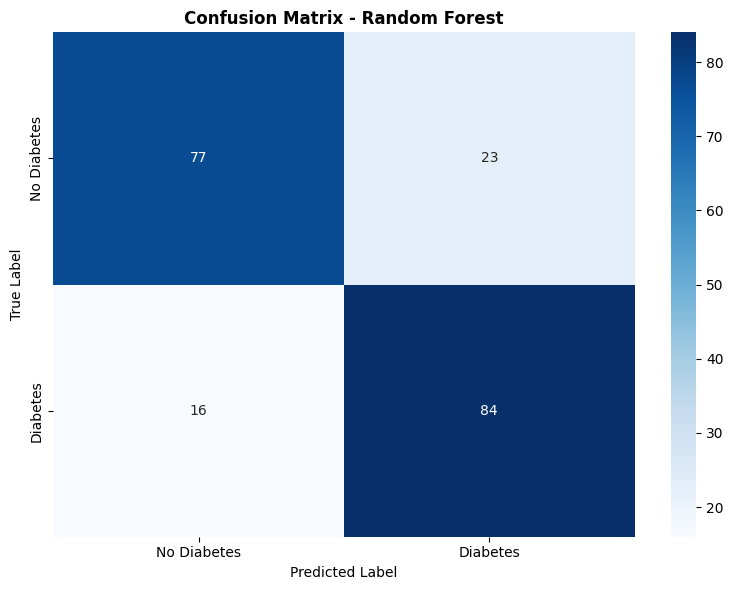

In [58]:
print("\n" + "-"*80)
print("DETAILED EVALUATION OF BEST MODEL")
print("-"*80)

y_pred_best = best_model.predict(x_test_scaled)

print(f"\nClassification Report ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best,
                           target_names=['No Diabetes', 'Diabetes']))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.svg')
plt.show()


--------------------------------------------------------------------------------
LEARNING CURVES ANALYSIS
--------------------------------------------------------------------------------


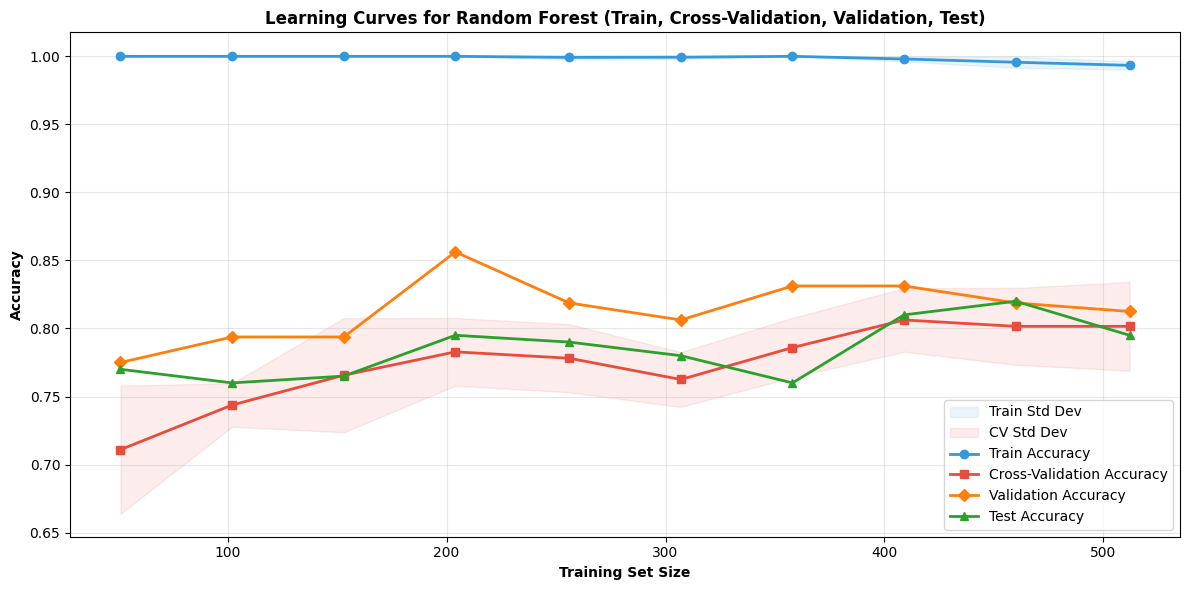

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score # Added for test/validation scoring
from sklearn.base import clone # Added for robust model re-initialization

print("\n" + "-"*80)
print("LEARNING CURVES ANALYSIS")
print("-"*80)

# 1. Generate learning curves for training and cross-validation from the training set
train_sizes, train_scores, cv_scores = learning_curve(
    best_model, x_train_scaled, y_train_encoded,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1) # Cross-validation scores on training data
cv_std = np.std(cv_scores, axis=1)

# 2. Calculate learning curves for the separate Validation and Test sets
val_scores_at_sizes = []
test_scores_at_sizes = []

for current_train_size in train_sizes:
    # Train the model on a random subset of the training data of 'current_train_size'
    n_samples_train = len(x_train_scaled)
    actual_train_size = int(current_train_size) # Ensure integer for indexing

    if actual_train_size > 0:
        # Generate random indices for the subset of training data
        indices = np.random.choice(n_samples_train, size=actual_train_size, replace=False)
        subset_x_train = x_train_scaled[indices]
        subset_y_train = y_train_encoded[indices]

        # Reinitialize and train a fresh model for each training size
        temp_model = clone(best_model)
        temp_model.fit(subset_x_train, subset_y_train)

        # Evaluate on the fixed validation set
        y_pred_val_subset = temp_model.predict(x_val_scaled)
        val_scores_at_sizes.append(accuracy_score(y_val_encoded, y_pred_val_subset))

        # Evaluate on the fixed test set
        y_pred_test_subset = temp_model.predict(x_test_scaled)
        test_scores_at_sizes.append(accuracy_score(y_test_encoded, y_pred_test_subset))
    else:
        # If no training data, scores are 0.0
        val_scores_at_sizes.append(0.0)
        test_scores_at_sizes.append(0.0)

val_mean = np.array(val_scores_at_sizes)
test_mean = np.array(test_scores_at_sizes)


# 3. Plot all four curves (Train, Cross-Validation, Validation, Test)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot standard deviations for Train and CV (from learning_curve)
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
               alpha=0.1, color='#3498db', label='Train Std Dev')
ax.fill_between(train_sizes, cv_mean - cv_std, cv_mean + cv_std,
               alpha=0.1, color='#e74c3c', label='CV Std Dev')

# Plot mean accuracies
ax.plot(train_sizes, train_mean, 'o-', color='#3498db', linewidth=2, label='Train Accuracy')
ax.plot(train_sizes, cv_mean, 's-', color='#e74c3c', linewidth=2, label='Cross-Validation Accuracy')
ax.plot(train_sizes, val_mean, 'D-', color='#ff7f0e', linewidth=2, label='Validation Accuracy') # New: actual validation set
ax.plot(train_sizes, test_mean, '^-', color='#2ca02c', linewidth=2, label='Test Accuracy')       # New: actual test set

ax.set_xlabel('Training Set Size', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title(f'Learning Curves for {best_model_name} (Train, Cross-Validation, Validation, Test)', fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curves.svg')
plt.show()


--------------------------------------------------------------------------------
FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

Top 15 Important Features:
                 Feature  Importance  Percentage
                 Glucose    0.270539   27.053929
                     BMI    0.179386   17.938628
                     Age    0.147179   14.717937
DiabetesPedigreeFunction    0.112660   11.265957
             Pregnancies    0.081297    8.129730
           BloodPressure    0.078731    7.873142
           SkinThickness    0.074162    7.416188
                 Insulin    0.056045    5.604489

Features for 80% importance: 6
Features for 90% importance: 7


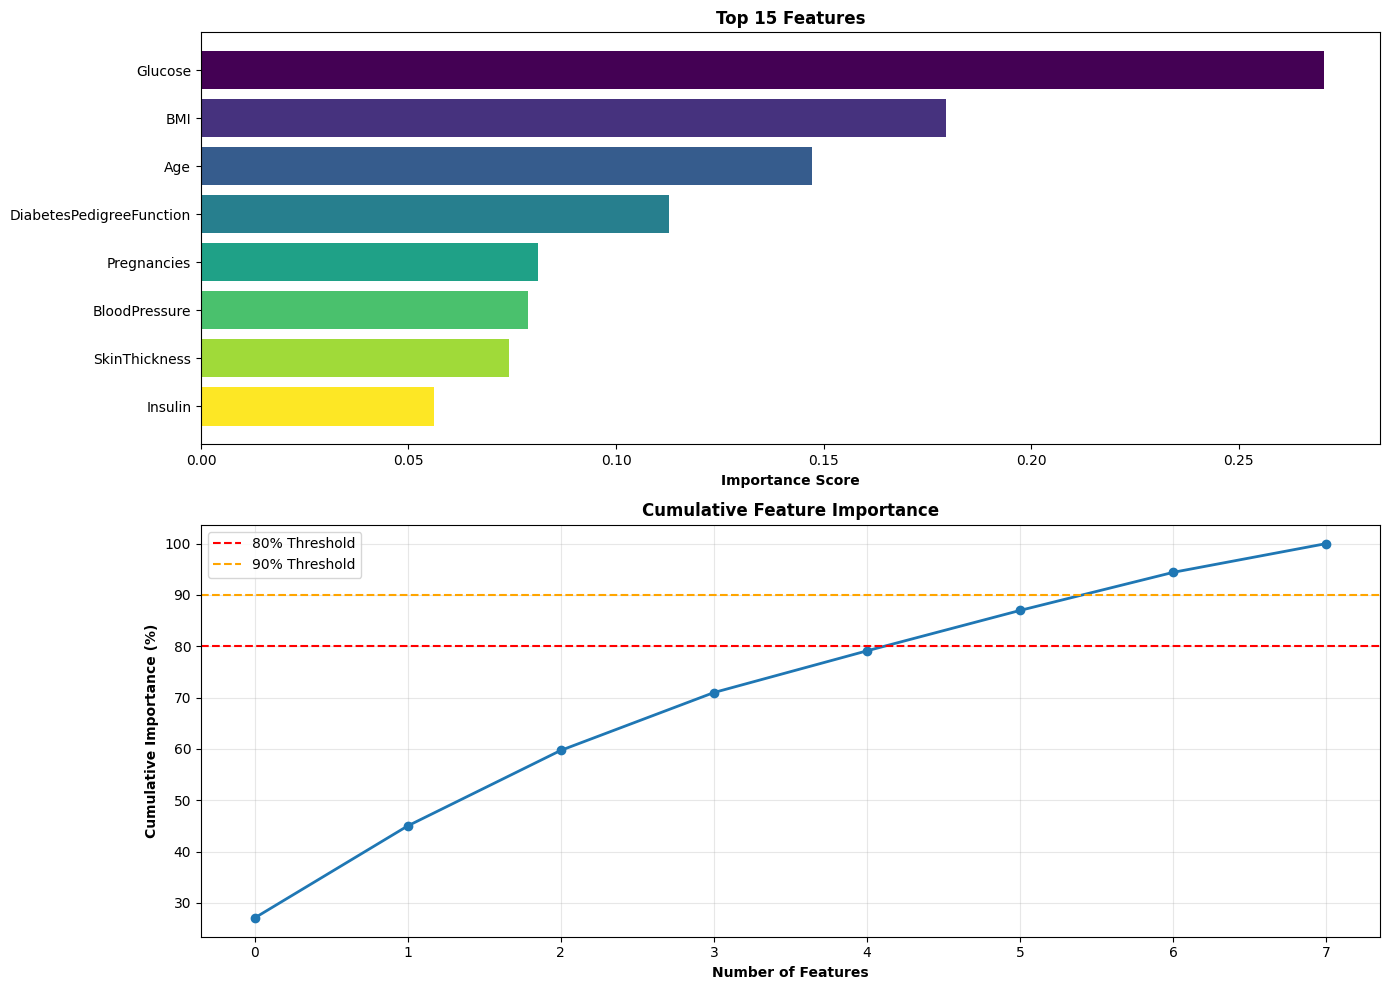

In [60]:
if hasattr(best_model, 'feature_importances_'):
    print("\n" + "-"*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("-"*80)

    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': x.columns,
        'Importance': importances,
        'Percentage': (importances / importances.sum() * 100)
    }).sort_values('Importance', ascending=False)

    print("\nTop 15 Important Features:")
    print(feature_importance_df.head(15).to_string(index=False))

    # Cumulative importance
    cumsum = feature_importance_df['Percentage'].cumsum()
    features_80 = (cumsum <= 80).sum() + 1
    features_90 = (cumsum <= 90).sum() + 1
    print(f"\nFeatures for 80% importance: {features_80}")
    print(f"Features for 90% importance: {features_90}")

    # Visualization
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Top features
    top_15 = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))
    axes[0].barh(range(len(top_15)), top_15['Importance'], color=colors)
    axes[0].set_yticks(range(len(top_15)))
    axes[0].set_yticklabels(top_15['Feature'])
    axes[0].set_xlabel('Importance Score', fontweight='bold')
    axes[0].set_title('Top 15 Features', fontweight='bold')
    axes[0].invert_yaxis()

    # Cumulative
    axes[1].plot(range(len(feature_importance_df)), cumsum.values, marker='o', linewidth=2)
    axes[1].axhline(y=80, color='r', linestyle='--', label='80% Threshold')
    axes[1].axhline(y=90, color='orange', linestyle='--', label='90% Threshold')
    axes[1].set_xlabel('Number of Features', fontweight='bold')
    axes[1].set_ylabel('Cumulative Importance (%)', fontweight='bold')
    axes[1].set_title('Cumulative Feature Importance', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_importance.svg')
    plt.show()


--------------------------------------------------------------------------------
PRECISION-RECALL ANALYSIS
--------------------------------------------------------------------------------


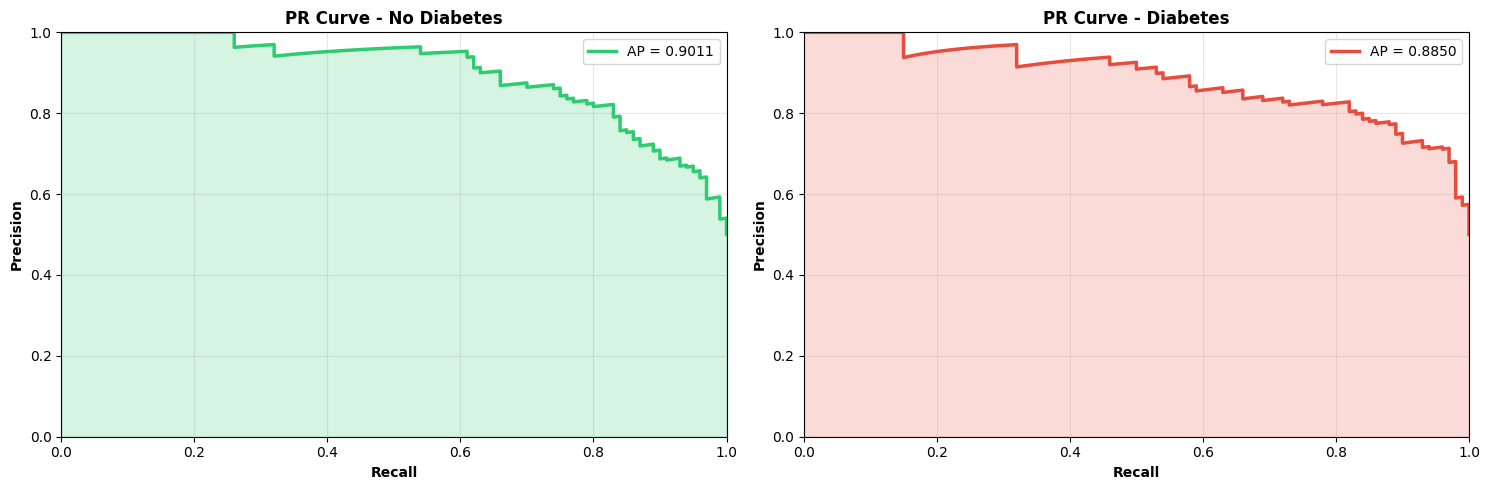

In [61]:
print("\n" + "-"*80)
print("PRECISION-RECALL ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

# Adjust number of subplots to match actual number of classes (2)
fig, axes = plt.subplots(1, len(le.classes_), figsize=(15, 5))
# Adjust class names and colors for binary classification
class_names = ['No Diabetes', 'Diabetes']
colors_pr = ['#2ecc71', '#e74c3c']

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    precision, recall, _ = precision_recall_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    avg_precision = average_precision_score(y_true_binary_class_i, y_pred_proba_best[:, i])

    axes[i].plot(recall, precision, color=colors_pr[i], lw=2.5,
                label=f'AP = {avg_precision:.4f}')
    axes[i].fill_between(recall, precision, alpha=0.2, color=colors_pr[i])
    axes[i].set_xlabel('Recall', fontweight='bold')
    axes[i].set_ylabel('Precision', fontweight='bold')
    axes[i].set_title(f'PR Curve - {class_names[i]}', fontweight='bold')
    axes[i].legend(loc='best')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('precision_recall_curves.svg')
plt.show()


--------------------------------------------------------------------------------
ROC CURVES ANALYSIS
--------------------------------------------------------------------------------


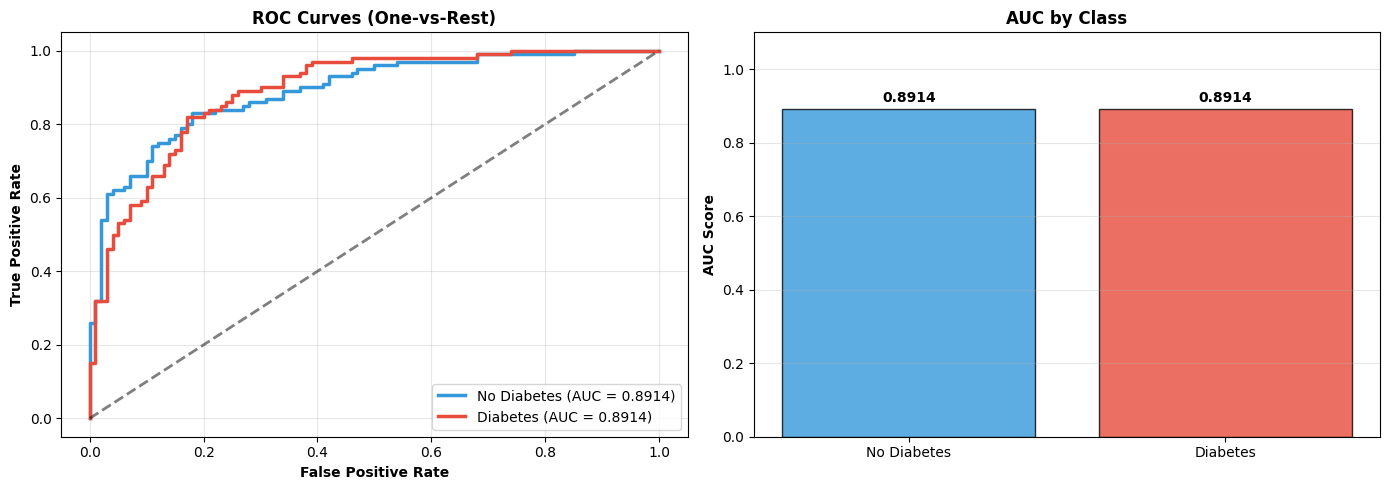


ROC-AUC Summary:
  No Diabetes: 0.8914
  Diabetes: 0.8914


In [62]:
print("\n" + "-"*80)
print("ROC CURVES ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
colors_roc = ['#3498db', '#e74c3c'] # Only two colors for two classes
class_names = ['No Diabetes', 'Diabetes'] # Only two class names

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    fpr[i], tpr[i], _ = roc_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary_class_i, y_pred_proba_best[:, i])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curves
for i, color in zip(range(len(le.classes_)), colors_roc): # Iterate only for two classes
    axes[0].plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('ROC Curves (One-vs-Rest)', fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# AUC Scores
auc_scores = [roc_auc[i] for i in range(len(le.classes_))] # Collect AUC scores for two classes
axes[1].bar(class_names, auc_scores, color=colors_roc, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('AUC Score', fontweight='bold')
axes[1].set_title('AUC by Class', fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

for i, score in enumerate(auc_scores):
    axes[1].text(i, score + 0.02, f'{score:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('roc_curves_and_auc.svg')
plt.show()

print("\nROC-AUC Summary:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: {roc_auc[i]:.4f}")


--------------------------------------------------------------------------------
AGE-BASED DIABETES ANALYSIS
--------------------------------------------------------------------------------

Age Group    | Total      | Diabetes Rate  
----------------------------------------
20-30        | 396        | 0.00           %
30-40        | 165        | 0.00           %
40-50        | 118        | 0.00           %
50-60        | 57         | 0.00           %
60-70        | 29         | 0.00           %
70-80        | 2          | 0.00           %
80+          | 1          | 0.00           %


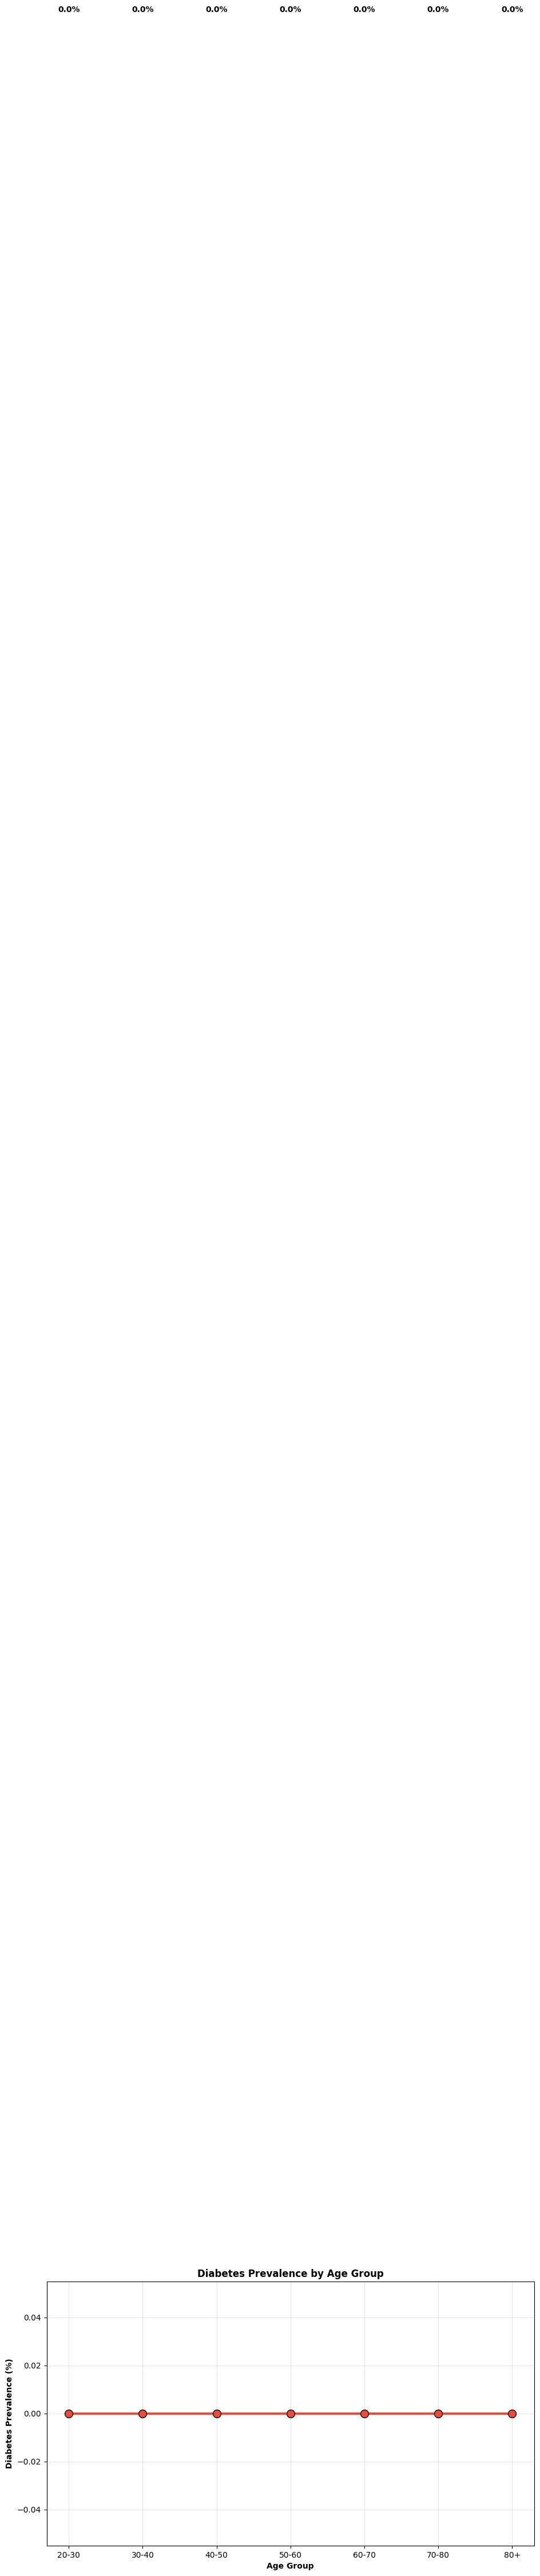

In [63]:
if 'Age' in df.columns:
    print("\n" + "-"*80)
    print("AGE-BASED DIABETES ANALYSIS")
    print("-"*80)

    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
    age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    print(f"\n{'Age Group':<12} | {'Total':<10} | {'Diabetes Rate':<15}")
    print("-" * 40)

    age_prevalence = []
    for age_group in age_labels:
        group_data = df[df['Age_Group'] == age_group]
        total = len(group_data)
        if total > 0:
            diabetes_count = (group_data[target_column] == 2).sum()
            rate = diabetes_count / total * 100
            print(f"{age_group:<12} | {total:<10,} | {rate:<15.2f}%")
            age_prevalence.append({'Age_Group': age_group, 'Rate': rate})

    # Visualization
    age_prev_df = pd.DataFrame(age_prevalence)
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.plot(age_prev_df['Age_Group'], age_prev_df['Rate'], marker='o',
           linewidth=3, markersize=10, color='#e74c3c', markeredgecolor='black')
    ax.fill_between(range(len(age_prev_df)), age_prev_df['Rate'], alpha=0.3, color='#e74c3c')
    ax.set_xlabel('Age Group', fontweight='bold')
    ax.set_ylabel('Diabetes Prevalence (%)', fontweight='bold')
    ax.set_title('Diabetes Prevalence by Age Group', fontweight='bold')
    ax.grid(True, alpha=0.3)

    for i, rate in enumerate(age_prev_df['Rate']):
        ax.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('age_group_prevalence.svg')
    plt.show()

In [64]:
print("\n" + "="*80)
print("SAVING ARTIFACTS")
print("="*80)

joblib.dump(best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n✓ Model and preprocessors saved successfully!")

def load_saved_artifacts():
    """Load saved model and preprocessors with error handling"""
    try:
        model = joblib.load('best_diabetes_model.pkl')
        scaler_obj = joblib.load('scaler.pkl')
        le_obj = joblib.load('label_encoder.pkl')
        print("✓ All artifacts loaded successfully!")
        return model, scaler_obj, le_obj
    except FileNotFoundError as e:
        print(f"✗ Error loading artifacts: {e}")
        print("Using current session objects instead.")
        return best_model, scaler, le

def predict_diabetes_risk_enhanced(patient_data, model=None, scaler_obj=None, le_obj=None):
    """
    Enhanced prediction function with validation and error handling

    Args:
        patient_data (dict): Patient health metrics
        model: Trained model (uses best_model if None)
        scaler_obj: Fitted scaler (uses scaler if None)
        le_obj: Label encoder (uses le if None)

    Returns:
        dict: Prediction results with probabilities and risk metrics
    """
    if model is None:
        model = best_model
    if scaler_obj is None:
        scaler_obj = scaler
    if le_obj is None:
        le_obj = le

    try:
        # Validate input
        if not isinstance(patient_data, dict):
            raise ValueError("patient_data must be a dictionary")

        # Convert to DataFrame
        patient_df = pd.DataFrame([patient_data])

        # Fill missing columns with median
        for col in x.columns:
            if col not in patient_df.columns:
                patient_df[col] = x[col].median()

        # Reorder columns
        patient_df = patient_df[x.columns]

        # Validate value ranges
        for col in patient_df.columns:
            if patient_df[col].isnull().any():
                print(f"⚠ Warning: Column {col} has null values, using median")
                patient_df[col].fillna(x[col].median(), inplace=True)

        # Scale
        patient_scaled = scaler_obj.transform(patient_df)

        # Predict
        prediction_encoded = model.predict(patient_scaled)[0]
        prediction_label = le_obj.inverse_transform([prediction_encoded])[0]

        # Get probabilities
        proba = model.predict_proba(patient_scaled)[0]
        prob_dict = {class_name: f"{proba[i]:.2%}"
                    for i, class_name in enumerate(le_obj.classes_)}

        # Risk score (0-10)
        # Assuming binary classification: proba[1] is the probability of the positive class (Diabetes)
        risk_score = proba[1] * 10

        # Determine risk level based on the prediction label
        risk_levels_map = {
            0: 'Low Risk',
            1: 'High Risk'
        }
        risk_level = risk_levels_map.get(prediction_encoded, 'Unknown Risk')

        return {
            'prediction': prediction_label,
            'prediction_label': prediction_label,
            'risk_level': risk_level,
            'risk_score': f"{risk_score:.1f}/10",
            'probabilities': prob_dict,
            'confidence': f"{max(proba)*100:.1f}%"
        }

    except Exception as e:
        print(f"✗ Prediction Error: {e}")
        return None

# Test prediction function
print("\nTesting Prediction Function:")
print("-" * 80)

example_patient = {col: x[col].median() for col in x.columns}
result = predict_diabetes_risk_enhanced(example_patient)

if result:
    print(f"""
Patient Risk Assessment:
  ├─ Prediction: {result['prediction_label']}
  ├─ Risk Level: {result['risk_level']}
  ├─ Risk Score: {result['risk_score']}
  ├─ Confidence: {result['confidence']}
  └─ Probabilities:
""")
    for risk, prob in result['probabilities'].items():
        print(f"      • {risk}: {prob}")


SAVING ARTIFACTS

✓ Model and preprocessors saved successfully!

Testing Prediction Function:
--------------------------------------------------------------------------------

Patient Risk Assessment:
  ├─ Prediction: 1
  ├─ Risk Level: High Risk
  ├─ Risk Score: 6.2/10
  ├─ Confidence: 61.9%
  └─ Probabilities:

      • 0: 38.10%
      • 1: 61.90%


In [65]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*80)

# Retrieve metrics for the best model after hyperparameter tuning
final_best_model_metrics = results_after[best_model_name]

print(f"""
Best Model: {best_model_name}
Test Accuracy: {final_best_model_metrics['test_accuracy']:.4f}
F1-Score: {final_best_model_metrics['f1']:.4f}
Precision: {final_best_model_metrics['precision']:.4f}
Recall: {final_best_model_metrics['recall']:.4f}

✓ Model ready for deployment!
""")



ANALYSIS COMPLETE - FINAL SUMMARY

Best Model: Random Forest
Test Accuracy: 0.8050
F1-Score: 0.8048
Precision: 0.8065
Recall: 0.8050

✓ Model ready for deployment!



In [10]:
print("\nFeature Statistics by Diabetes Status:")
print("-" * 80)
x = df.drop(target_column, axis=1) # Define x as features
for col in x.columns[:5]:  # Show first 5 numeric features
    print(f"\n{col}:")
    for diabetes_status in [0, 1, 2]:
        subset = df[df[target_column] == diabetes_status][col]
        print(f"  {['No Diabetes', 'Pre-diabetes', 'Diabetes'][diabetes_status]:<15} - Mean: {subset.mean():.3f}, Std: {subset.std():.3f}")


Feature Statistics by Diabetes Status:
--------------------------------------------------------------------------------

Pregnancies:
  No Diabetes     - Mean: 3.298, Std: 3.017
  Pre-diabetes    - Mean: 4.866, Std: 3.741
  Diabetes        - Mean: nan, Std: nan

Glucose:
  No Diabetes     - Mean: 109.980, Std: 26.141
  Pre-diabetes    - Mean: 141.257, Std: 31.940
  Diabetes        - Mean: nan, Std: nan

BloodPressure:
  No Diabetes     - Mean: 68.184, Std: 18.063
  Pre-diabetes    - Mean: 70.825, Std: 21.492
  Diabetes        - Mean: nan, Std: nan

SkinThickness:
  No Diabetes     - Mean: 19.664, Std: 14.890
  Pre-diabetes    - Mean: 22.164, Std: 17.680
  Diabetes        - Mean: nan, Std: nan

Insulin:
  No Diabetes     - Mean: 68.792, Std: 98.865
  Pre-diabetes    - Mean: 100.336, Std: 138.689
  Diabetes        - Mean: nan, Std: nan


In [11]:
print("\n" + "-"*80)
print("DATA QUALITY METRICS")
print("-"*80)

duplicate_rows = df.duplicated().sum()
missing_values = df.isnull().sum().sum()
y = df[target_column] # Define y as the target variable
class_imbalance_ratio = y.value_counts().max() / y.value_counts().min()

print(f"""
Data Quality Check:
  ├─ Duplicate Rows: {duplicate_rows}
  ├─ Missing Values: {missing_values}
  ├─ Class Imbalance Ratio: {class_imbalance_ratio:.2f}:1
  └─ Status: {'✓ GOOD' if class_imbalance_ratio < 3 else '⚠ MODERATE' if class_imbalance_ratio < 10 else '✗ SEVERE'}
""")


--------------------------------------------------------------------------------
DATA QUALITY METRICS
--------------------------------------------------------------------------------

Data Quality Check:
  ├─ Duplicate Rows: 0
  ├─ Missing Values: 0
  ├─ Class Imbalance Ratio: 1.87:1
  └─ Status: ✓ GOOD



In [12]:
# 2. DEFINE TARGET AND FEATURES
# ------------------------------------------------------------
# The 'CLASS' and 'Gender' columns are not present in the pima_indian.csv dataset.
# Removing the logic that attempts to map or encode them.

# We will use the globally defined 'target_column' (which is 'Outcome') as our target.
target_column_for_y = target_column # Using the 'Outcome' column from the dataset

columns_to_drop = [col for col in ["ID", "No_Pation"] if col in df.columns] # Removed 'CLASS' from this list
df_features = df.drop(columns=columns_to_drop, errors="ignore")

# It needs to be numerically encoded for SMOTE and model training
le_target = LabelEncoder()
y = le_target.fit_transform(df_features[target_column_for_y])

# Define features 'X' by dropping the target column from df_features
X = df_features.drop(columns=[target_column_for_y])

print("\nClass distribution BEFORE balancing:")
print(pd.Series(y).value_counts())


# 3. HANDLE MISSING VALUES (NUMERIC)

non_numeric_cols_in_X = X.select_dtypes(exclude=np.number).columns
if len(non_numeric_cols_in_X) > 0:
    print(f"Warning: Non-numeric columns found in X: {non_numeric_cols_in_X.tolist()}. These will be dropped for mean imputation.")
    X = X.drop(columns=non_numeric_cols_in_X)

X = X.fillna(X.mean())

# 4. FEATURE SCALING

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. DATA AUGMENTATION & BALANCING (SMOTE)
smote = SMOTE(
    sampling_strategy='auto',
    random_state=42,
    k_neighbors=5
)

# Ensure y has more than 1 class for SMOTE to work
if len(pd.Series(y).unique()) <= 1:
    raise ValueError("Target variable 'y' has 1 or fewer unique classes, SMOTE cannot be applied.")

X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("\nClass distribution AFTER SMOTE:")
print(pd.Series(y_balanced).value_counts())

# ------------------------------------------------------------
# 6. TRAIN / VALIDATION / TEST SPLIT
#    64% Train, 16% Val, 20% Test
# ------------------------------------------------------------

# First split: Train (64%) + Temp (36%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_balanced, y_balanced,
    test_size=0.36,
    random_state=42,
    stratify=y_balanced
)

# Second split: Validation (16%) + Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5556,  # 20 / (16 + 20)
    random_state=42,
    stratify=y_temp
)

# ------------------------------------------------------------
# 7. FINAL DATASET SUMMARY
# ------------------------------------------------------------
print("\nFinal Data Split:")
print(f"  Training:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_balanced)*100:.1f}%)")
print(f"  Validation: {X_val.shape[0]:,} samples ({X_val.shape[0]/len(X_balanced)*100:.1f}%) affinities")
print(f"  Testing:    {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_balanced)*100:.1f}%)")


Class distribution BEFORE balancing:
0    500
1    268
Name: count, dtype: int64

Class distribution AFTER SMOTE:
1    500
0    500
Name: count, dtype: int64

Final Data Split:
  Training:   640 samples (64.0%)
  Validation: 159 samples (15.9%) affinities
  Testing:    201 samples (20.1%)



SMOTE Impact Visualization:


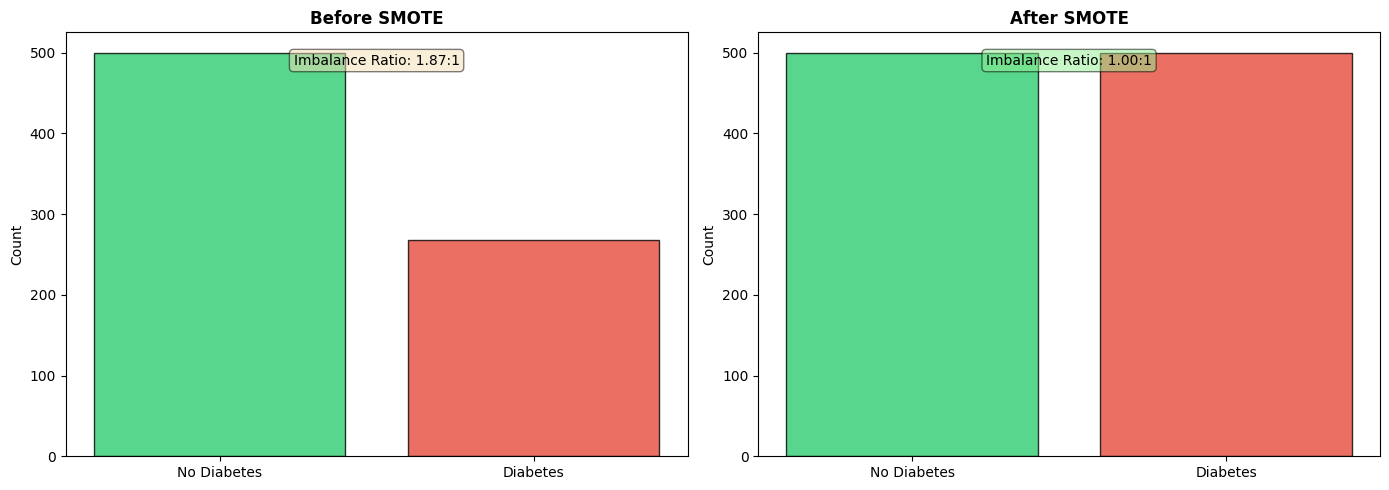

In [13]:
print("\nSMOTE Impact Visualization:")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before SMOTE
before_counts = pd.Series(y).value_counts().sort_index()
axes[0].bar(['No Diabetes', 'Diabetes'], before_counts.values,
           color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[0].set_title('Before SMOTE', fontweight='bold')
axes[0].set_ylabel('Count')
imbalance_before = before_counts.max() / before_counts.min()
axes[0].text(0.5, 0.95, f'Imbalance Ratio: {imbalance_before:.2f}:1',
            transform=axes[0].transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# After SMOTE
after_counts = pd.Series(y_balanced).value_counts().sort_index() # Corrected variable name to y_balanced
axes[1].bar(['No Diabetes', 'Diabetes'], after_counts.values,
           color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
axes[1].set_title('After SMOTE', fontweight='bold')
axes[1].set_ylabel('Count')
imbalance_after = after_counts.max() / after_counts.min()
axes[1].text(0.5, 0.95, f'Imbalance Ratio: {imbalance_after:.2f}:1',
            transform=axes[1].transAxes, ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------
STRATIFIED DATA SPLITTING
--------------------------------------------------------------------------------

Final Data Split:
  Training:   640 samples (64.0%)
  Validation: 160 samples (16.0%)
  Testing:    200 samples (20.0%)


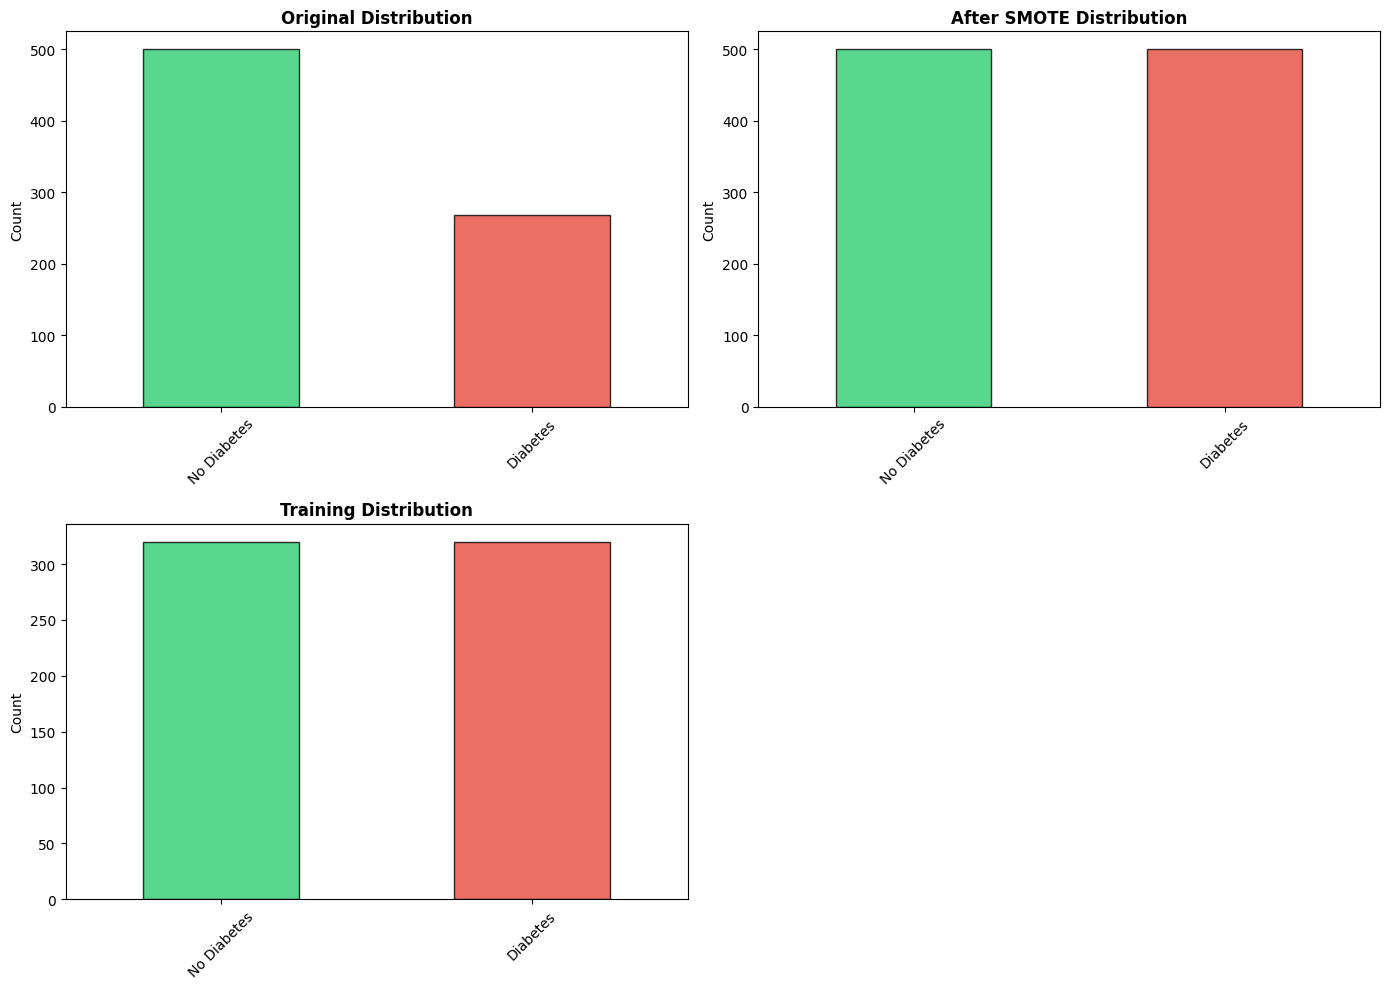

In [14]:
print("\n" + "-"*80)
print("STRATIFIED DATA SPLITTING")
print("-"*80)

# 80% train+val, 20% test
x_temp, x_test, y_temp, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

# Further split: 80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp,
    test_size=0.2,
    random_state=42,
    stratify=y_temp
)

print(f"\nFinal Data Split:")
print(f"  Training:   {x_train.shape[0]:,} samples ({x_train.shape[0]/len(y_balanced)*100:.1f}%)")
print(f"  Validation: {x_val.shape[0]:,} samples ({x_val.shape[0]/len(y_balanced)*100:.1f}%)")
print(f"  Testing:    {x_test.shape[0]:,} samples ({x_test.shape[0]/len(y_balanced)*100:.1f}%)")

# Visualize splits
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, data, label in zip(axes.flatten()[:3],
                           [pd.Series(y), pd.Series(y_balanced), pd.Series(y_train), pd.Series(y_test)],
                           ['Original', 'After SMOTE', 'Training', 'Testing']):
    if label in ['Training', 'Testing']:
        data.value_counts().sort_index().plot(kind='bar', ax=ax,
                                              color=['#2ecc71', '#e74c3c'],
                                              alpha=0.8, edgecolor='black')
    else:
        data.value_counts().sort_index().plot(kind='bar', ax=ax,
                                              color=['#2ecc71', '#e74c3c'],
                                              alpha=0.8, edgecolor='black')
    ax.set_title(f'{label} Distribution', fontweight='bold')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=45)
    ax.set_ylabel('Count')

axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------
STRATIFIED DATA SPLITTING
--------------------------------------------------------------------------------

Final Data Split:
  Training:   640 samples (64.0%)
  Validation: 160 samples (16.0%) affinities
  Testing:    200 samples (20.0%) affinities


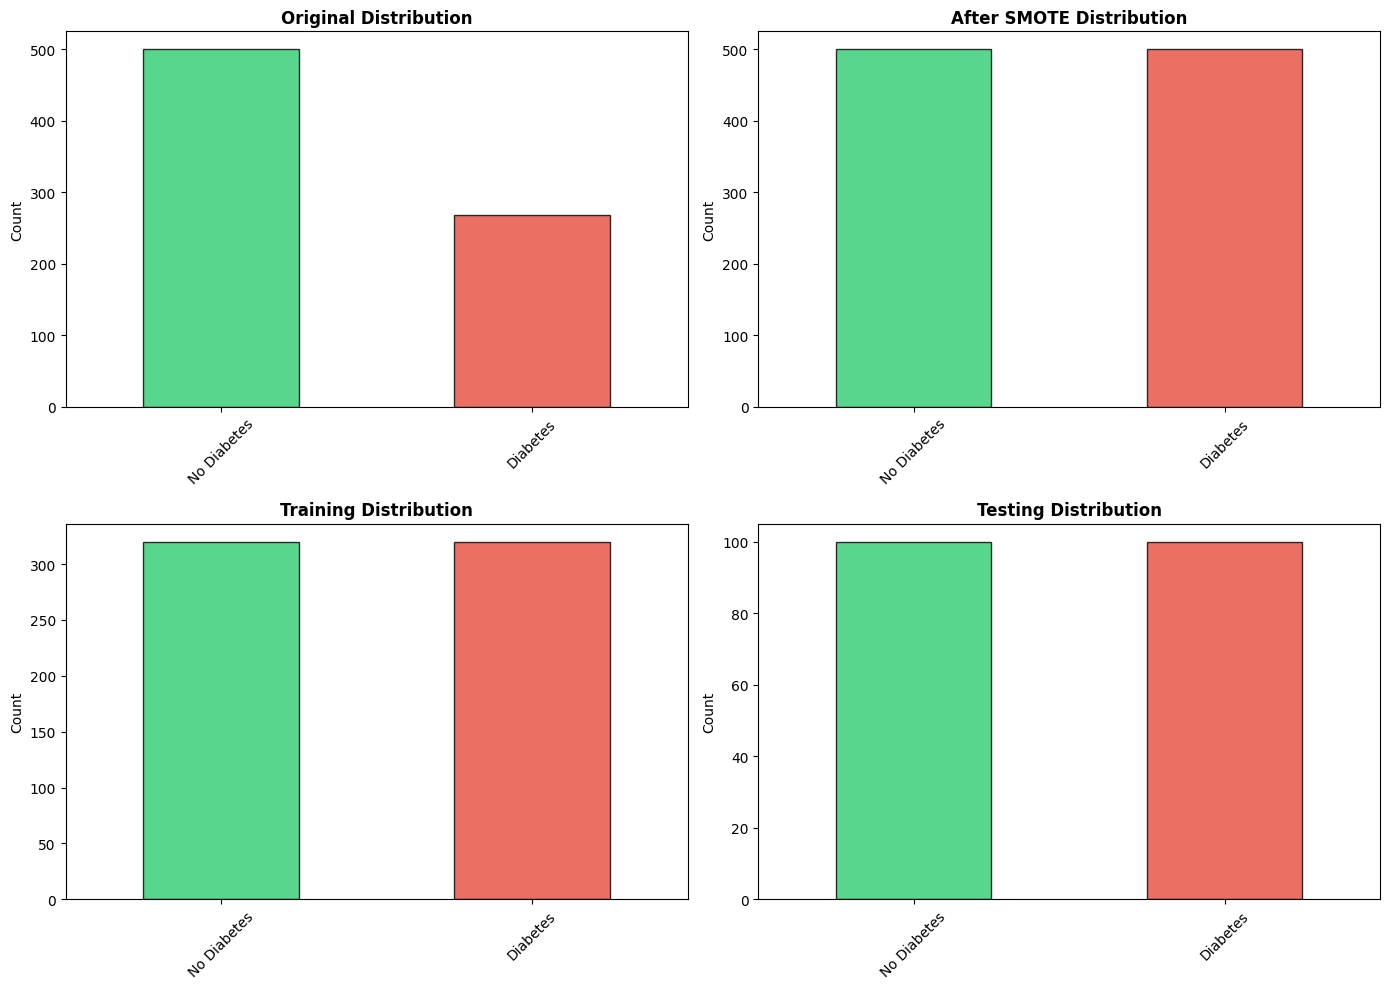

In [15]:
print("\n" + "-"*80)
print("STRATIFIED DATA SPLITTING")
print("-"*80)

# 80% train+val, 20% test
x_temp, x_test, y_temp, y_test = train_test_split(
    X_balanced, y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

# Further split: 80% train, 20% validation
x_train, x_val, y_train, y_val = train_test_split(
    x_temp, y_temp,
    test_size=0.2,
    random_state=42,
    stratify=y_temp
)

print(f"\nFinal Data Split:")
print(f"  Training:   {x_train.shape[0]:,} samples ({x_train.shape[0]/len(y_balanced)*100:.1f}%)")
print(f"  Validation: {x_val.shape[0]:,} samples ({x_val.shape[0]/len(y_balanced)*100:.1f}%) affinities")
print(f"  Testing:    {x_test.shape[0]:,} samples ({x_test.shape[0]/len(y_balanced)*100:.1f}%) affinities")

# Visualize splits
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, data, label in zip(axes.flatten()[:3],
                           [y, y_balanced, y_train],
                           ['Original', 'After SMOTE', 'Training']):
    pd.Series(data).value_counts().sort_index().plot(kind='bar', ax=ax,
                                              color=['#2ecc71', '#e74c3c'],
                                              alpha=0.8, edgecolor='black')
    ax.set_title(f'{label} Distribution', fontweight='bold')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=45)
    ax.set_ylabel('Count')

# The test set needs a separate plot due to `axes.flatten()[:3]`
ax_test = axes.flatten()[3]
pd.Series(y_test).value_counts().sort_index().plot(kind='bar', ax=ax_test,
                                          color=['#2ecc71', '#e74c3c'],
                                          alpha=0.8, edgecolor='black')
ax_test.set_title('Testing Distribution', fontweight='bold')
ax_test.set_xticklabels(['No Diabetes', 'Diabetes'], rotation=45)
ax_test.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
print("\n" + "-"*80)
print("FEATURE SCALING")
print("-"*80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

print("Feature scaling completed.")
print("Target encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"  {i}: {label}")



--------------------------------------------------------------------------------
FEATURE SCALING
--------------------------------------------------------------------------------
Feature scaling completed.
Target encoding mapping:
  0: 0
  1: 1



Scaling Validation (First 5 Features):
--------------------------------------------------------------------------------
      Feature  Original_Mean   Scaled_Mean  Original_Std  Scaled_Std
  Pregnancies       0.036585 -3.053113e-17      0.988574         1.0
      Glucose       0.177906 -1.676177e-16      0.974725         1.0
BloodPressure       0.004411  1.630640e-17      0.992260         1.0
SkinThickness       0.035145 -1.425943e-16      1.007275         1.0
      Insulin       0.052035  1.738193e-16      1.031683         1.0


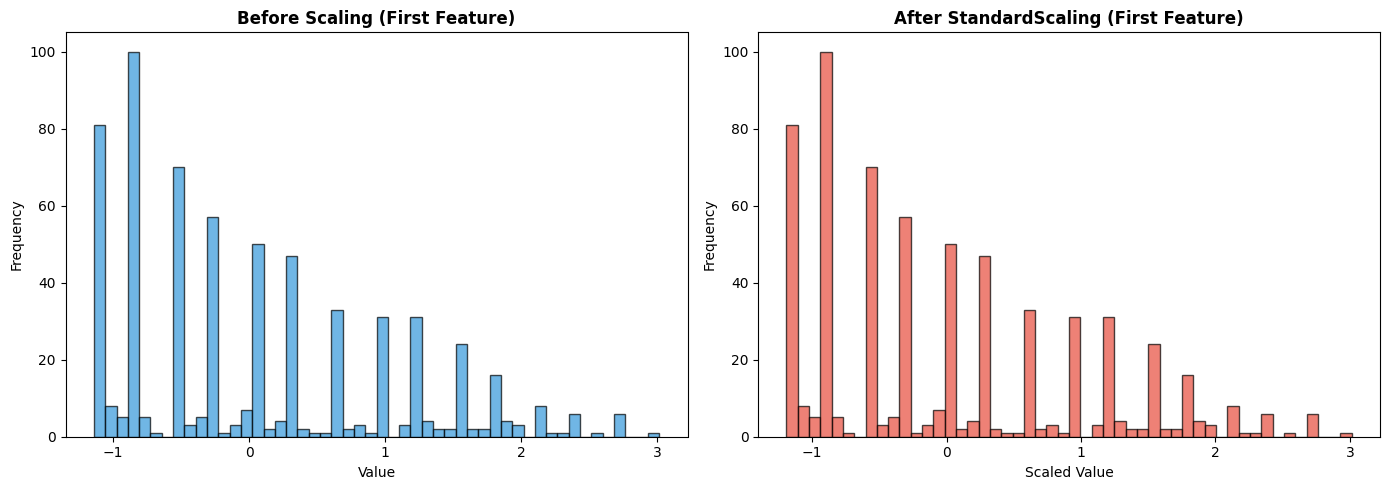

In [17]:
print("\nScaling Validation (First 5 Features):")
print("-" * 80)

comparison_df = pd.DataFrame({
    'Feature': x.columns[:5],
    'Original_Mean': x_train[:, :5].mean(axis=0),
    'Scaled_Mean': x_train_scaled[:, :5].mean(axis=0),
    'Original_Std': x_train[:, :5].std(axis=0),
    'Scaled_Std': x_train_scaled[:, :5].std(axis=0)
})

print(comparison_df.to_string(index=False))

# Visualization: Before vs After Scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].hist(x_train[:, 0], bins=50, alpha=0.7, color='#3498db', edgecolor='black')
axes[0].set_title('Before Scaling (First Feature)', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# After scaling
axes[1].hist(x_train_scaled[:, 0], bins=50, alpha=0.7, color='#e74c3c', edgecolor='black')
axes[1].set_title('After StandardScaling (First Feature)', fontweight='bold')
axes[1].set_xlabel('Scaled Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

MODEL TRAINING

In [18]:
print("\n" + "="*80)
print("MODEL TRAINING WITH HYPERPARAMETER TUNING")
print("="*80)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Bagging Classifier': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
}

def train_and_evaluate_models(models, x_train, y_train, x_val, y_val, x_test, y_test):
    """Train models and evaluate on validation and test sets"""
    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(x_train, y_train)

        # Predictions
        y_pred_val = model.predict(x_val)
        y_pred_test = model.predict(x_test)
        y_proba_test = model.predict_proba(x_test) if hasattr(model, "predict_proba") else None

        # Metrics
        results[name] = {
            'model': model,
            'val_accuracy': accuracy_score(y_val, y_pred_val),
            'test_accuracy': accuracy_score(y_test, y_pred_test),
            'test_f1': f1_score(y_test, y_pred_test, average='weighted'),
            'test_precision': precision_score(y_test, y_pred_test, average='weighted'),
            'test_recall': recall_score(y_test, y_pred_test, average='weighted'),
            'predictions': y_pred_test,
            'probabilities': y_proba_test
        }

        print(f"  Val Accuracy: {results[name]['val_accuracy']:.4f}")
        print(f"  Test Accuracy: {results[name]['test_accuracy']:.4f}")
        print(f"  Test F1-Score: {results[name]['test_f1']:.4f}")
        print(f"  Precision: {results[name]['test_precision']:.4f}")
        print(f"  Recall: {results[name]['test_recall']:.4f}")


    return results

results = train_and_evaluate_models(models, x_train_scaled, y_train_encoded,
                                   x_val_scaled, y_val_encoded,
                                   x_test_scaled, y_test_encoded)


MODEL TRAINING WITH HYPERPARAMETER TUNING

Training Logistic Regression...
  Val Accuracy: 0.8000
  Test Accuracy: 0.7600
  Test F1-Score: 0.7599
  Precision: 0.7604
  Recall: 0.7600

Training Random Forest...
  Val Accuracy: 0.8125
  Test Accuracy: 0.8050
  Test F1-Score: 0.8048
  Precision: 0.8065
  Recall: 0.8050

Training XGBoost...
  Val Accuracy: 0.8063
  Test Accuracy: 0.8000
  Test F1-Score: 0.7997
  Precision: 0.8019
  Recall: 0.8000

Training K-Nearest Neighbors...
  Val Accuracy: 0.8187
  Test Accuracy: 0.7550
  Test F1-Score: 0.7528
  Precision: 0.7646
  Recall: 0.7550

Training Gradient Boosting...
  Val Accuracy: 0.7812
  Test Accuracy: 0.8050
  Test F1-Score: 0.8049
  Precision: 0.8058
  Recall: 0.8050

Training AdaBoost...
  Val Accuracy: 0.8500
  Test Accuracy: 0.7750
  Test F1-Score: 0.7749
  Precision: 0.7757
  Recall: 0.7750

Training Bagging Classifier...
  Val Accuracy: 0.8187
  Test Accuracy: 0.8050
  Test F1-Score: 0.8049
  Precision: 0.8058
  Recall: 0.8050



--------------------------------------------------------------------------------
MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------

              Model  Val Accuracy  Test Accuracy  F1-Score  Precision  Recall
      Random Forest       0.81250          0.805  0.804761   0.806502   0.805
 Bagging Classifier       0.81875          0.805  0.804878   0.805764   0.805
  Gradient Boosting       0.78125          0.805  0.804878   0.805764   0.805
            XGBoost       0.80625          0.800  0.799679   0.801932   0.800
           AdaBoost       0.85000          0.775  0.774859   0.775689   0.775
Logistic Regression       0.80000          0.760  0.759904   0.760417   0.760
K-Nearest Neighbors       0.81875          0.755  0.752769   0.764550   0.755

✓ BEST MODEL SELECTED (Initial): Random Forest
  Test Accuracy: 0.8050


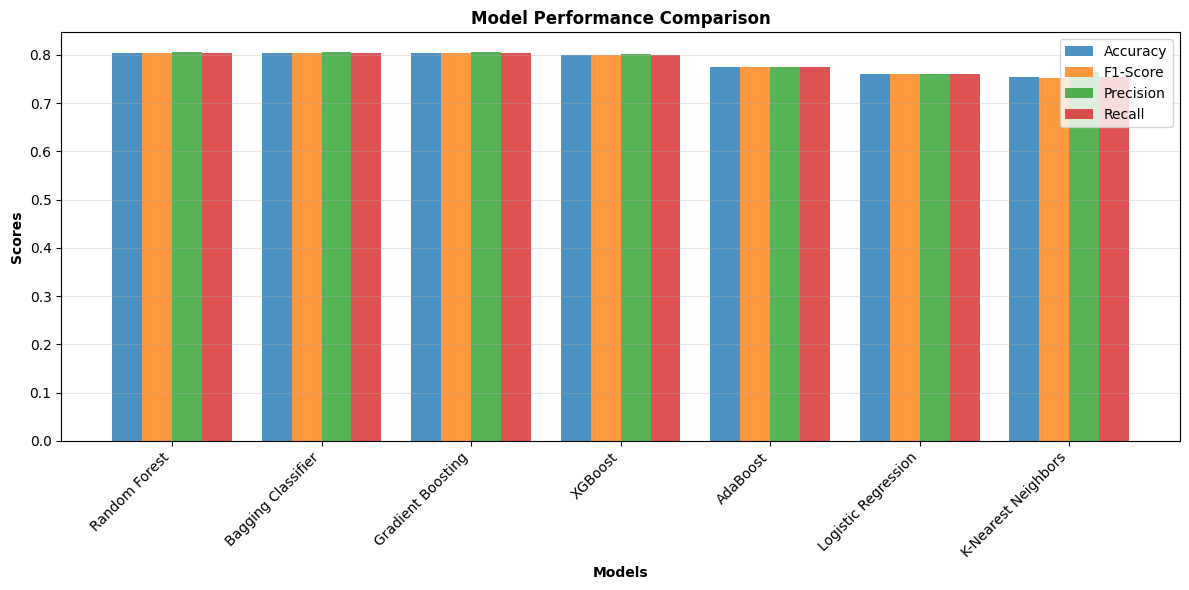

In [32]:
print("\n" + "-"*80)
print("MODEL PERFORMANCE COMPARISON")
print("-"*80)

results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Val Accuracy': [results[m]['val_accuracy'] for m in results],
    'Test Accuracy': [results[m]['test_accuracy'] for m in results],
    'F1-Score': [results[m]['test_f1'] for m in results],
    'Precision': [results[m]['test_precision'] for m in results],
    'Recall': [results[m]['test_recall'] for m in results]
}).sort_values('Test Accuracy', ascending=False)

print("\n" + results_df.to_string(index=False))

# Select best model (from initial training)
best_model_name_initial = results_df.iloc[0]['Model']
best_model_initial = results[best_model_name_initial]['model']
print(f"\n✓ BEST MODEL SELECTED (Initial): {best_model_name_initial}")
print(f"  Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}")

# Visualize model comparison
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(results_df))
width = 0.2

ax.bar(x_pos - 1.5*width, results_df['Test Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x_pos - 0.5*width, results_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax.bar(x_pos + 0.5*width, results_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x_pos + 1.5*width, results_df['Recall'], width, label='Recall', alpha=0.8)

ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Model Performance Comparison', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('model_performance_comparison.svg')
plt.show()


Overfitting Analysis - Train vs Validation Performance:
--------------------------------------------------------------------------------
Random Forest             | Val: 0.8125 | Test: 0.8050 | Gap: 0.0075 | ✓ Good
Bagging Classifier        | Val: 0.8187 | Test: 0.8050 | Gap: 0.0137 | ✓ Good
Gradient Boosting         | Val: 0.7812 | Test: 0.8050 | Gap: -0.0238 | ✓ Good
XGBoost                   | Val: 0.8063 | Test: 0.8000 | Gap: 0.0062 | ✓ Good
AdaBoost                  | Val: 0.8500 | Test: 0.7750 | Gap: 0.0750 | ⚠ Overfitting
Logistic Regression       | Val: 0.8000 | Test: 0.7600 | Gap: 0.0400 | ✓ Good
K-Nearest Neighbors       | Val: 0.8187 | Test: 0.7550 | Gap: 0.0637 | ⚠ Overfitting


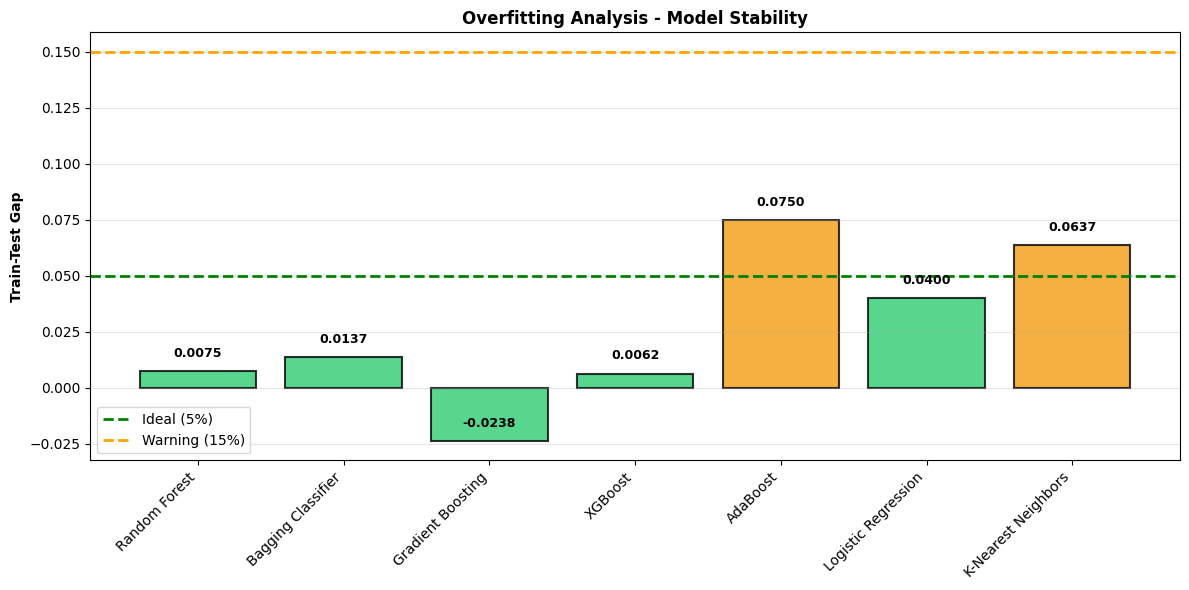

In [33]:
print("\nOverfitting Analysis - Train vs Validation Performance:")
print("-" * 80)

overfitting_data = []
for model_name in results_df['Model']:
    val_acc = results[model_name]['val_accuracy']
    test_acc = results[model_name]['test_accuracy']
    gap = val_acc - test_acc
    status = '✓ Good' if gap < 0.05 else '⚠ Overfitting' if gap < 0.15 else '✗ Severe'

    overfitting_data.append({
        'Model': model_name,
        'Val_Acc': val_acc,
        'Test_Acc': test_acc,
        'Gap': gap,
        'Status': status
    })
    print(f"{model_name:<25} | Val: {val_acc:.4f} | Test: {test_acc:.4f} | Gap: {gap:.4f} | {status}")

# Visualization: Train vs Validation Gap
fig, ax = plt.subplots(figsize=(12, 6))
models_list = [d['Model'] for d in overfitting_data]
gaps = [d['Gap'] for d in overfitting_data]
colors_gap = ['#2ecc71' if g < 0.05 else '#f39c12' if g < 0.15 else '#e74c3c' for g in gaps]

bars = ax.bar(models_list, gaps, color=colors_gap, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.axhline(y=0.05, color='green', linestyle='--', linewidth=2, label='Ideal (5%)')
ax.axhline(y=0.15, color='orange', linestyle='--', linewidth=2, label='Warning (15%)')
ax.set_ylabel('Train-Test Gap', fontweight='bold')
ax.set_title('Overfitting Analysis - Model Stability', fontweight='bold')
ax.set_xticklabels(models_list, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

for bar, gap in zip(bars, gaps):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
           f'{gap:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('overfitting_analysis.svg')
plt.show()

hyperparameter tunning



MODEL TRAINING BEFORE RANDOMIZED SEARCH

Logistic Regression
  Val Accuracy : 0.8000
  Test Accuracy: 0.7600
  F1-Score     : 0.7599
  Precision    : 0.7604
  Recall       : 0.7600

Random Forest
  Val Accuracy : 0.8313
  Test Accuracy: 0.8000
  F1-Score     : 0.7998
  Precision    : 0.8011
  Recall       : 0.8000

XGBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7850
  F1-Score     : 0.7850
  Precision    : 0.7850
  Recall       : 0.7850

K-Nearest Neighbors
  Val Accuracy : 0.8187
  Test Accuracy: 0.7550
  F1-Score     : 0.7528
  Precision    : 0.7646
  Recall       : 0.7550

Gradient Boosting
  Val Accuracy : 0.8187
  Test Accuracy: 0.8200
  F1-Score     : 0.8199
  Precision    : 0.8205
  Recall       : 0.8200

AdaBoost
  Val Accuracy : 0.8250
  Test Accuracy: 0.7650
  F1-Score     : 0.7645
  Precision    : 0.7672
  Recall       : 0.7650

Bagging Classifier
  Val Accuracy : 0.7875
  Test Accuracy: 0.8050
  F1-Score     : 0.8049
  Precision    : 0.8058
  Recall       : 0.8050

MOD

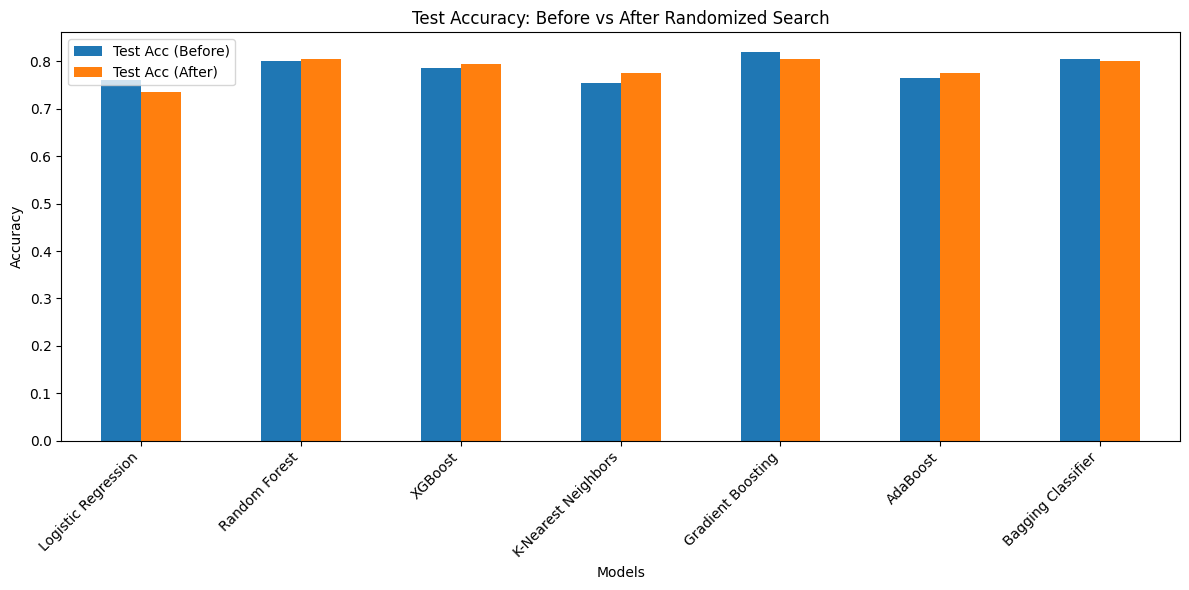

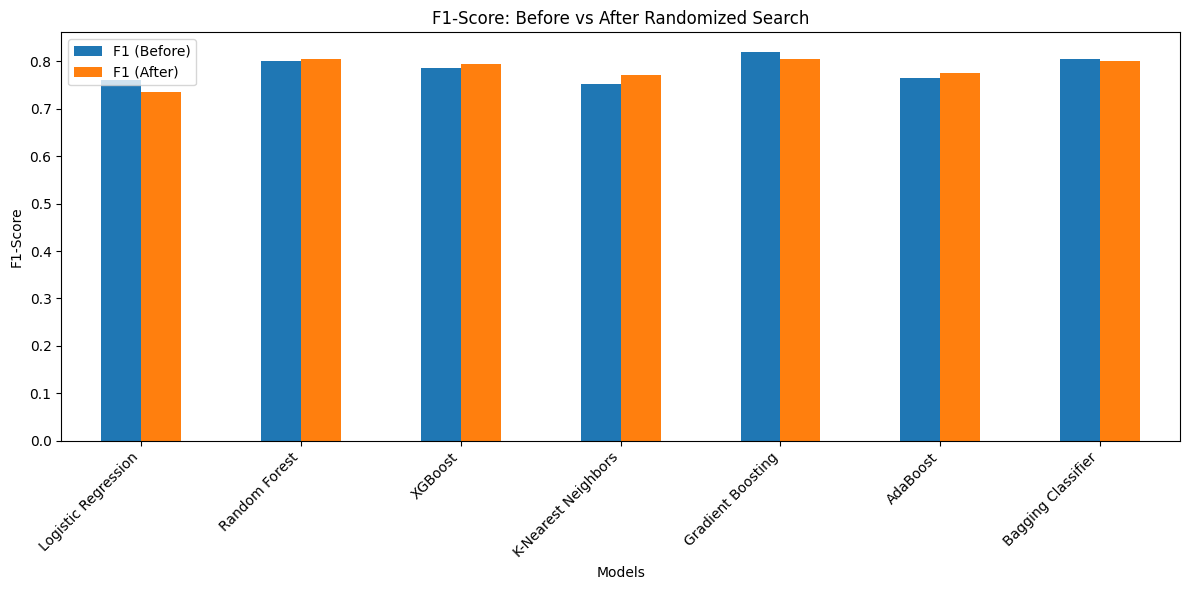

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


models = {
    'Logistic Regression': LogisticRegression(
        max_iter=2000, multi_class='multinomial', solver='lbfgs'
    ),

    'Random Forest': RandomForestClassifier(random_state=42),

    'XGBoost': XGBClassifier(
        eval_metric='mlogloss',
        random_state=42
    ),

    'K-Nearest Neighbors': KNeighborsClassifier(),

    'Gradient Boosting': GradientBoostingClassifier(random_state=42),

    'AdaBoost': AdaBoostClassifier(random_state=42),

    'Bagging Classifier': BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        random_state=42
    )
}


param_distributions = {
    'Logistic Regression': {
        'C': np.logspace(-3, 2, 20)
    },

    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },

    'XGBoost': {
        'n_estimators': [100, 200, 400],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },

    'K-Nearest Neighbors': {
        'n_neighbors': range(3, 15),
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },

    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5]
    },

    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'Bagging Classifier': {
        'n_estimators': [100, 200, 300],
        'max_samples': [0.6, 0.8, 1.0],
        'max_features': [0.6, 0.8, 1.0]
    }
}

def evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test):
    model.fit(x_train, y_train)

    y_val_pred = model.predict(x_val)
    y_test_pred = model.predict(x_test)

    return {
        'val_accuracy': accuracy_score(y_val, y_val_pred),
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred, average='weighted'),
        'precision': precision_score(y_test, y_test_pred, average='weighted'),
        'recall': recall_score(y_test, y_test_pred, average='weighted')
    }


print("\n" + "="*80)
print("MODEL TRAINING BEFORE RANDOMIZED SEARCH")
print("="*80)

results_before = {}

for name, model in models.items():
    metrics = evaluate_model(
        model,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )
    results_before[name] = metrics

    print(f"\n{name}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


print("\n" + "="*80)
print("MODEL TRAINING AFTER RANDOMIZED SEARCH")
print("="*80)

results_after = {}

# Store best estimators directly in results_after
for name, model in models.items():
    print(f"\nTuning {name}...")

    random_search = RandomizedSearchCV(
        model,
        param_distributions[name],
        n_iter=30,
        scoring='f1_weighted',
        cv=3,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(x_train_scaled, y_train_encoded)
    best_model_tuned = random_search.best_estimator_

    metrics = evaluate_model(
        best_model_tuned,
        x_train_scaled, y_train_encoded,
        x_val_scaled, y_val_encoded,
        x_test_scaled, y_test_encoded
    )

    results_after[name] = {'model': best_model_tuned, **metrics}

    print(f"  Best Params  : {random_search.best_params_}")
    print(f"  Val Accuracy : {metrics['val_accuracy']:.4f}")
    print(f"  Test Accuracy: {metrics['test_accuracy']:.4f}")
    print(f"  F1-Score     : {metrics['f1']:.4f}")
    print(f"  Precision    : {metrics['precision']:.4f}")
    print(f"  Recall       : {metrics['recall']:.4f}")


models_list = list(results_before.keys())

comparison_df = pd.DataFrame({
    'Model': models_list,
    'Test Acc (Before)': [results_before[m]['test_accuracy'] for m in models_list],
    'Test Acc (After)':  [results_after[m]['test_accuracy'] for m in models_list],
    'F1 (Before)': [results_before[m]['f1'] for m in models_list],
    'F1 (After)':  [results_after[m]['f1'] for m in models_list]
})

print("\n" + "="*80)
print("FINAL COMPARISON TABLE")
print("="*80)
print(comparison_df.sort_values('Test Acc (After)', ascending=False))


comparison_df.set_index('Model')[['Test Acc (Before)', 'Test Acc (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("Test Accuracy: Before vs After Randomized Search")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test_accuracy_before_after_tuning.svg')
plt.show()


comparison_df.set_index('Model')[['F1 (Before)', 'F1 (After)']].plot(
    kind='bar', figsize=(12, 6)
)
plt.title("F1-Score: Before vs After Randomized Search")
plt.ylabel("F1-Score")
plt.xlabel("Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('f1_score_before_after_tuning.svg')
plt.show()


--------------------------------------------------------------------------------
DETAILED EVALUATION OF BEST MODEL
--------------------------------------------------------------------------------

Classification Report (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.82      0.77      0.79       100
    Diabetes       0.78      0.83      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



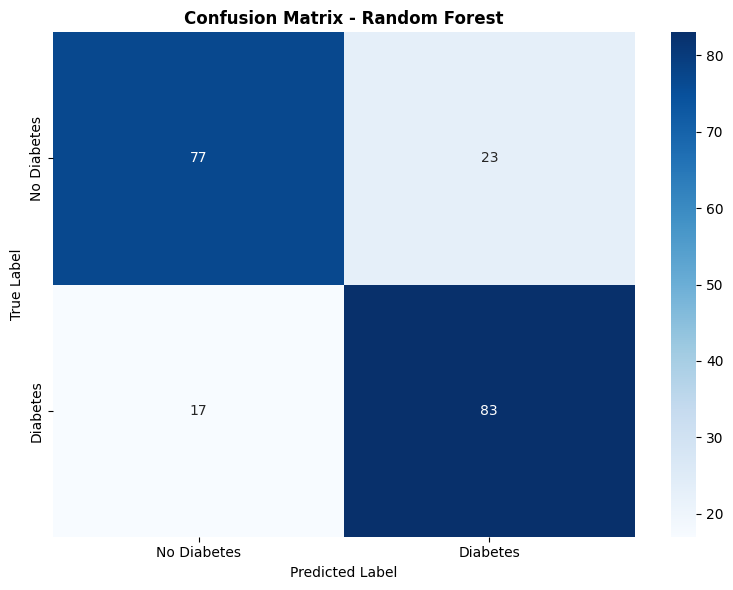

In [34]:
print("\n" + "-"*80)
print("DETAILED EVALUATION OF BEST MODEL")
print("-"*80)

y_pred_best = best_model.predict(x_test_scaled)

print(f"\nClassification Report ({best_model_name}):")
print(classification_report(y_test_encoded, y_pred_best,
                           target_names=['No Diabetes', 'Diabetes']))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.svg')
plt.show()


--------------------------------------------------------------------------------
LEARNING CURVES ANALYSIS
--------------------------------------------------------------------------------


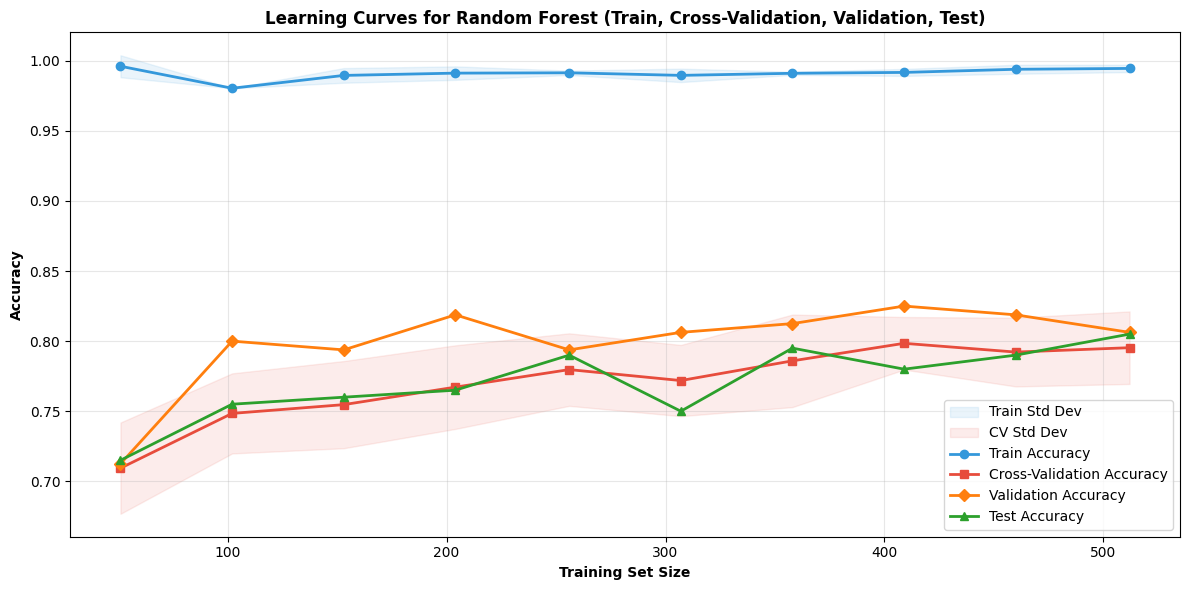

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score # Added for test/validation scoring
from sklearn.base import clone # Added for robust model re-initialization

print("\n" + "-"*80)
print("LEARNING CURVES ANALYSIS")
print("-"*80)

# 1. Generate learning curves for training and cross-validation from the training set
train_sizes, train_scores, cv_scores = learning_curve(
    best_model, x_train_scaled, y_train_encoded,
    cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1) # Cross-validation scores on training data
cv_std = np.std(cv_scores, axis=1)

# 2. Calculate learning curves for the separate Validation and Test sets
val_scores_at_sizes = []
test_scores_at_sizes = []

for current_train_size in train_sizes:
    # Train the model on a random subset of the training data of 'current_train_size'
    n_samples_train = len(x_train_scaled)
    actual_train_size = int(current_train_size) # Ensure integer for indexing

    if actual_train_size > 0:
        # Generate random indices for the subset of training data
        indices = np.random.choice(n_samples_train, size=actual_train_size, replace=False)
        subset_x_train = x_train_scaled[indices]
        subset_y_train = y_train_encoded[indices]

        # Reinitialize and train a fresh model for each training size
        temp_model = clone(best_model)
        temp_model.fit(subset_x_train, subset_y_train)

        # Evaluate on the fixed validation set
        y_pred_val_subset = temp_model.predict(x_val_scaled)
        val_scores_at_sizes.append(accuracy_score(y_val_encoded, y_pred_val_subset))

        # Evaluate on the fixed test set
        y_pred_test_subset = temp_model.predict(x_test_scaled)
        test_scores_at_sizes.append(accuracy_score(y_test_encoded, y_pred_test_subset))
    else:
        # If no training data, scores are 0.0
        val_scores_at_sizes.append(0.0)
        test_scores_at_sizes.append(0.0)

val_mean = np.array(val_scores_at_sizes)
test_mean = np.array(test_scores_at_sizes)


# 3. Plot all four curves (Train, Cross-Validation, Validation, Test)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot standard deviations for Train and CV (from learning_curve)
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
               alpha=0.1, color='#3498db', label='Train Std Dev')
ax.fill_between(train_sizes, cv_mean - cv_std, cv_mean + cv_std,
               alpha=0.1, color='#e74c3c', label='CV Std Dev')

# Plot mean accuracies
ax.plot(train_sizes, train_mean, 'o-', color='#3498db', linewidth=2, label='Train Accuracy')
ax.plot(train_sizes, cv_mean, 's-', color='#e74c3c', linewidth=2, label='Cross-Validation Accuracy')
ax.plot(train_sizes, val_mean, 'D-', color='#ff7f0e', linewidth=2, label='Validation Accuracy') # New: actual validation set
ax.plot(train_sizes, test_mean, '^-', color='#2ca02c', linewidth=2, label='Test Accuracy')       # New: actual test set

ax.set_xlabel('Training Set Size', fontweight='bold')
ax.set_ylabel('Accuracy', fontweight='bold')
ax.set_title(f'Learning Curves for {best_model_name} (Train, Cross-Validation, Validation, Test)', fontweight='bold')
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curves.svg')
plt.show()

In [36]:
if hasattr(best_model, 'feature_importances_'):
    print("\n" + "-"*80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("-"*80)

    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': x.columns,
        'Importance': importances,
        'Percentage': (importances / importances.sum() * 100)
    }).sort_values('Importance', ascending=False)

    print("\nTop 15 Important Features:")
    print(feature_importance_df.head(15).to_string(index=False))

    # Cumulative importance
    cumsum = feature_importance_df['Percentage'].cumsum()
    features_80 = (cumsum <= 80).sum() + 1
    features_90 = (cumsum <= 90).sum() + 1
    print(f"\nFeatures for 80% importance: {features_80}")
    print(f"Features for 90% importance: {features_90}")

    # Visualization
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Top features
    top_15 = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_15)))
    axes[0].barh(range(len(top_15)), top_15['Importance'], color=colors)
    axes[0].set_yticks(range(len(top_15)))
    axes[0].set_yticklabels(top_15['Feature'])
    axes[0].set_xlabel('Importance Score', fontweight='bold')
    axes[0].set_title('Top 15 Features', fontweight='bold')
    axes[0].invert_yaxis()

    # Cumulative
    axes[1].plot(range(len(feature_importance_df)), cumsum.values, marker='o', linewidth=2)
    axes[1].axhline(y=80, color='r', linestyle='--', label='80% Threshold')
    axes[1].axhline(y=90, color='orange', linestyle='--', label='90% Threshold')
    axes[1].set_xlabel('Number of Features', fontweight='bold')
    axes[1].set_ylabel('Cumulative Importance (%)', fontweight='bold')
    axes[1].set_title('Cumulative Feature Importance', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('feature_importance.svg')
    plt.show()


--------------------------------------------------------------------------------
PRECISION-RECALL ANALYSIS
--------------------------------------------------------------------------------


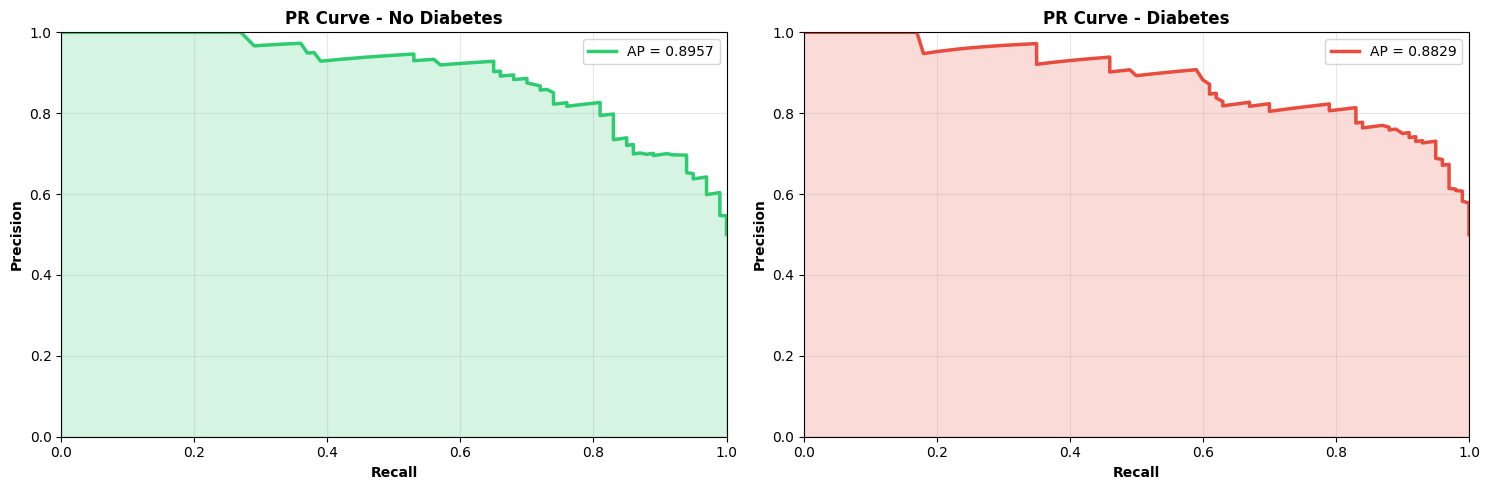

In [37]:
print("\n" + "-"*80)
print("PRECISION-RECALL ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

# Adjust number of subplots to match actual number of classes (2)
fig, axes = plt.subplots(1, len(le.classes_), figsize=(15, 5))
# Adjust class names and colors for binary classification
class_names = ['No Diabetes', 'Diabetes']
colors_pr = ['#2ecc71', '#e74c3c']

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    precision, recall, _ = precision_recall_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    avg_precision = average_precision_score(y_true_binary_class_i, y_pred_proba_best[:, i])

    axes[i].plot(recall, precision, color=colors_pr[i], lw=2.5,
                label=f'AP = {avg_precision:.4f}')
    axes[i].fill_between(recall, precision, alpha=0.2, color=colors_pr[i])
    axes[i].set_xlabel('Recall', fontweight='bold')
    axes[i].set_ylabel('Precision', fontweight='bold')
    axes[i].set_title(f'PR Curve - {class_names[i]}', fontweight='bold')
    axes[i].legend(loc='best')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('precision_recall_curves.svg')
plt.show()


--------------------------------------------------------------------------------
ROC CURVES ANALYSIS
--------------------------------------------------------------------------------


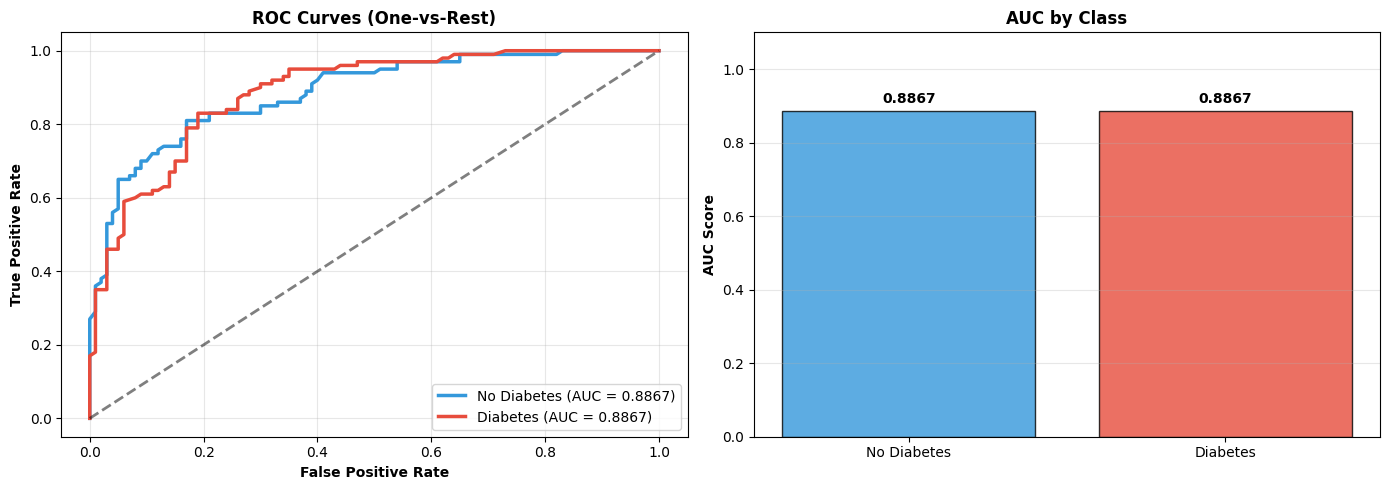


ROC-AUC Summary:
  No Diabetes: 0.8867
  Diabetes: 0.8867


In [38]:
print("\n" + "-"*80)
print("ROC CURVES ANALYSIS")
print("-"*80)

y_pred_proba_best = best_model.predict_proba(x_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
colors_roc = ['#3498db', '#e74c3c'] # Only two colors for two classes
class_names = ['No Diabetes', 'Diabetes'] # Only two class names

for i in range(len(le.classes_)): # Iterate only for the actual number of classes
    # Generate binary true labels for the current class dynamically
    y_true_binary_class_i = (y_test_encoded == le.classes_[i]).astype(int)

    fpr[i], tpr[i], _ = roc_curve(y_true_binary_class_i, y_pred_proba_best[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary_class_i, y_pred_proba_best[:, i])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curves
for i, color in zip(range(len(le.classes_)), colors_roc): # Iterate only for two classes
    axes[0].plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
axes[0].set_xlabel('False Positive Rate', fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontweight='bold')
axes[0].set_title('ROC Curves (One-vs-Rest)', fontweight='bold')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# AUC Scores
auc_scores = [roc_auc[i] for i in range(len(le.classes_))] # Collect AUC scores for two classes
axes[1].bar(class_names, auc_scores, color=colors_roc, alpha=0.8, edgecolor='black')
axes[1].set_ylabel('AUC Score', fontweight='bold')
axes[1].set_title('AUC by Class', fontweight='bold')
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

for i, score in enumerate(auc_scores):
    axes[1].text(i, score + 0.02, f'{score:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('roc_curves_and_auc.svg')
plt.show()

print("\nROC-AUC Summary:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: {roc_auc[i]:.4f}")

In [27]:
print("\n" + "-"*80)
print("CLINICAL RISK FACTOR ANALYSIS")
print("-"*80)

risk_factors = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk']
available_factors = [f for f in risk_factors if f in df.columns]

print(f"\nRisk Factor Prevalence:")
print(f"{'Risk Factor':<25} | {'Present':<10} | {'Percentage':<12}")
print("-" * 50)

for factor in available_factors:
    if df[factor].nunique() == 2:
        present = (df[factor] == 1).sum()
        pct = present / len(df) * 100
        print(f"{factor:<25} | {present:<10,} | {pct:<12.2f}%")


--------------------------------------------------------------------------------
CLINICAL RISK FACTOR ANALYSIS
--------------------------------------------------------------------------------

Risk Factor Prevalence:
Risk Factor               | Present    | Percentage  
--------------------------------------------------



--------------------------------------------------------------------------------
AGE-BASED DIABETES ANALYSIS
--------------------------------------------------------------------------------

Age Group    | Total      | Diabetes Rate  
----------------------------------------
20-30        | 396        | 0.00           %
30-40        | 165        | 0.00           %
40-50        | 118        | 0.00           %
50-60        | 57         | 0.00           %
60-70        | 29         | 0.00           %
70-80        | 2          | 0.00           %
80+          | 1          | 0.00           %


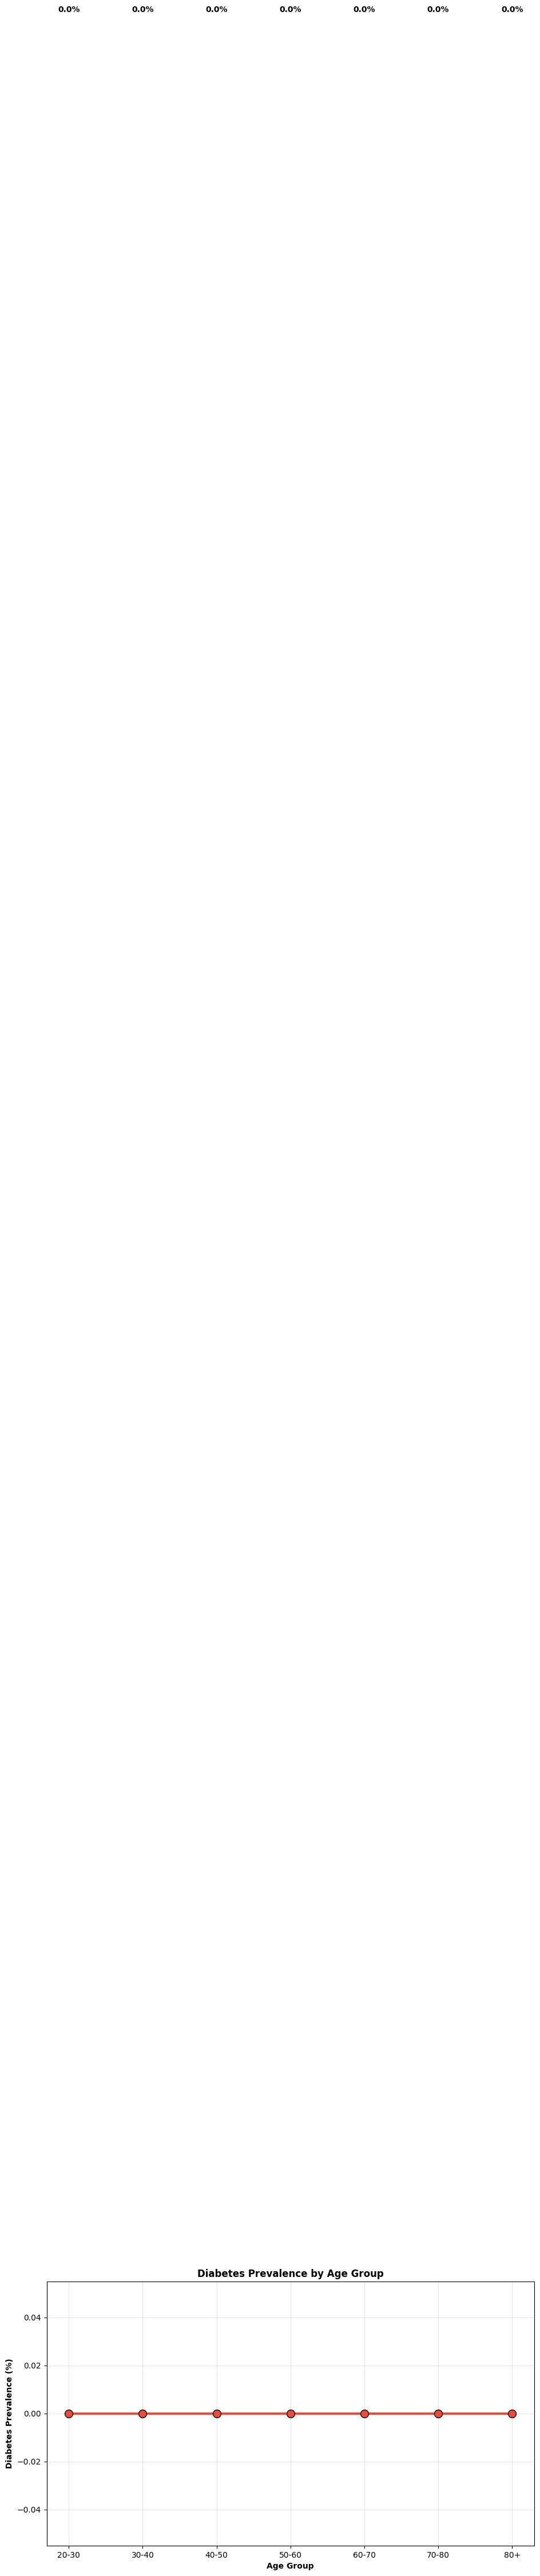

In [39]:
if 'Age' in df.columns:
    print("\n" + "-"*80)
    print("AGE-BASED DIABETES ANALYSIS")
    print("-"*80)

    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
    age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    print(f"\n{'Age Group':<12} | {'Total':<10} | {'Diabetes Rate':<15}")
    print("-" * 40)

    age_prevalence = []
    for age_group in age_labels:
        group_data = df[df['Age_Group'] == age_group]
        total = len(group_data)
        if total > 0:
            diabetes_count = (group_data[target_column] == 2).sum()
            rate = diabetes_count / total * 100
            print(f"{age_group:<12} | {total:<10,} | {rate:<15.2f}%")
            age_prevalence.append({'Age_Group': age_group, 'Rate': rate})

    # Visualization
    age_prev_df = pd.DataFrame(age_prevalence)
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.plot(age_prev_df['Age_Group'], age_prev_df['Rate'], marker='o',
           linewidth=3, markersize=10, color='#e74c3c', markeredgecolor='black')
    ax.fill_between(range(len(age_prev_df)), age_prev_df['Rate'], alpha=0.3, color='#e74c3c')
    ax.set_xlabel('Age Group', fontweight='bold')
    ax.set_ylabel('Diabetes Prevalence (%)', fontweight='bold')
    ax.set_title('Diabetes Prevalence by Age Group', fontweight='bold')
    ax.grid(True, alpha=0.3)

    for i, rate in enumerate(age_prev_df['Rate']):
        ax.text(i, rate + 1, f'{rate:.1f}%', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.savefig('age_group_prevalence.svg')
    plt.show()

In [45]:
print("\n" + "="*80)
print("SAVING ARTIFACTS")
print("="*80)

joblib.dump(best_model, 'best_diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\n✓ Model and preprocessors saved successfully!")

def load_saved_artifacts():
    """Load saved model and preprocessors with error handling"""
    try:
        model = joblib.load('best_diabetes_model.pkl')
        scaler_obj = joblib.load('scaler.pkl')
        le_obj = joblib.load('label_encoder.pkl')
        print("✓ All artifacts loaded successfully!")
        return model, scaler_obj, le_obj
    except FileNotFoundError as e:
        print(f"✗ Error loading artifacts: {e}")
        print("Using current session objects instead.")
        return best_model, scaler, le

def predict_diabetes_risk_enhanced(patient_data, model=None, scaler_obj=None, le_obj=None):
    """
    Enhanced prediction function with validation and error handling

    Args:
        patient_data (dict): Patient health metrics
        model: Trained model (uses best_model if None)
        scaler_obj: Fitted scaler (uses scaler if None)
        le_obj: Label encoder (uses le if None)

    Returns:
        dict: Prediction results with probabilities and risk metrics
    """
    if model is None:
        model = best_model
    if scaler_obj is None:
        scaler_obj = scaler
    if le_obj is None:
        le_obj = le

    try:
        # Validate input
        if not isinstance(patient_data, dict):
            raise ValueError("patient_data must be a dictionary")

        # Convert to DataFrame
        patient_df = pd.DataFrame([patient_data])

        # Fill missing columns with median
        for col in x.columns:
            if col not in patient_df.columns:
                patient_df[col] = x[col].median()

        # Reorder columns
        patient_df = patient_df[x.columns]

        # Validate value ranges
        for col in patient_df.columns:
            if patient_df[col].isnull().any():
                print(f"⚠ Warning: Column {col} has null values, using median")
                patient_df[col].fillna(x[col].median(), inplace=True)

        # Scale
        patient_scaled = scaler_obj.transform(patient_df)

        # Predict
        prediction_encoded = model.predict(patient_scaled)[0]
        prediction_label = le_obj.inverse_transform([prediction_encoded])[0]

        # Get probabilities
        proba = model.predict_proba(patient_scaled)[0]
        prob_dict = {class_name: f"{proba[i]:.2%}"
                    for i, class_name in enumerate(le_obj.classes_)}

        # Risk score (0-10)
        # Assuming binary classification: proba[1] is the probability of the positive class (Diabetes)
        risk_score = proba[1] * 10

        # Determine risk level based on the prediction label
        risk_levels_map = {
            0: 'Low Risk',
            1: 'High Risk'
        }
        risk_level = risk_levels_map.get(prediction_encoded, 'Unknown Risk')

        return {
            'prediction': prediction_label,
            'prediction_label': prediction_label,
            'risk_level': risk_level,
            'risk_score': f"{risk_score:.1f}/10",
            'probabilities': prob_dict,
            'confidence': f"{max(proba)*100:.1f}%"
        }

    except Exception as e:
        print(f"✗ Prediction Error: {e}")
        return None

# Test prediction function
print("\nTesting Prediction Function:")
print("-" * 80)

example_patient = {col: x[col].median() for col in x.columns}
result = predict_diabetes_risk_enhanced(example_patient)

if result:
    print(f"""
Patient Risk Assessment:
  ├─ Prediction: {result['prediction_label']}
  ├─ Risk Level: {result['risk_level']}
  ├─ Risk Score: {result['risk_score']}
  ├─ Confidence: {result['confidence']}
  └─ Probabilities:
""")
    for risk, prob in result['probabilities'].items():
        print(f"      • {risk}: {prob}")


SAVING ARTIFACTS

✓ Model and preprocessors saved successfully!

Testing Prediction Function:
--------------------------------------------------------------------------------

Patient Risk Assessment:
  ├─ Prediction: 1
  ├─ Risk Level: High Risk
  ├─ Risk Score: 6.2/10
  ├─ Confidence: 61.9%
  └─ Probabilities:

      • 0: 38.10%
      • 1: 61.90%


In [30]:
print("\n" + "="*80)
print("ANALYSIS COMPLETE - FINAL SUMMARY")
print("="*80)

print(f"""
Best Model: {best_model_name}
Test Accuracy: {results_df.iloc[0]['Test Accuracy']:.4f}
F1-Score: {results_df.iloc[0]['F1-Score']:.4f}
Precision: {results_df.iloc[0]['Precision']:.4f}
Recall: {results_df.iloc[0]['Recall']:.4f}

✓ Model ready for deployment!
""")



ANALYSIS COMPLETE - FINAL SUMMARY

Best Model: Random Forest
Test Accuracy: 0.8050
F1-Score: 0.8048
Precision: 0.8065
Recall: 0.8050

✓ Model ready for deployment!

